# Modelling the relationship between sales attributes and customer satisfaction: A machine learning framework for predicting review ratings in e-commerce

#### University of Essex, 2018-19

#### Dissertation submitted in partial fulfilment of the requirements for the award of MSc in Business Analytics

### Abstract

Big data analytics (BDA) is no longer a competitive advantage, but a compulsory ability to endure in an ecosystem increasingly attentive to customer behaviour. In this context, few industries offer such an abundance of raw customer data as e-commerce, where is possible to explore why users make many decisions and judgments. One of most commonly used feature in e-commerce is the online customer review rating (OCR), a form of electronic word of mouth (eWOM) that can reduce the unfamiliarity risk in purchase decision, and also seen as an essential index of overall customer satisfaction. Although the idea of OCRs as a sales driver being well researched, little is discussed about the factors coming from the side of the seller that drive the OCRs themselves. This research, as an alternative, uses OCR as the predicted variable, testing if the different ways the product and order were placed may impact on final consumer satisfaction (measured by the OCR). To investigate this relationship, the research conducts an Exploratory Data Analysis (EDA) of order attributes (such as delivery time, description length and price) contained in a data set of 100,000 transactions made through a Brazilian marketplace called Olist. Next, the research uses the attributes to predict the OCR through Linear and Ordinal Logistic regressions, as well as through Random Forest regression and classification models. The Random Forest classifier, in particular, produces a very reliable prediction, with an accuracy of 1.00 for OCRs rated as 1, 4 and 5, and an accuracy of 0.99 for OCRs rated as 2 and 3. The attribute weights and correlations are somewhat validated, and the outcomes may contribute to future work of scholars and entrepreneurs in the field of consumer behaviour, product management, and data analysis.
##### Keywords: customer satisfaction; OCR; e-commerce; sales attributes; Random Forest.

In [1]:
# Import all libraries 

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(rc={'figure.figsize':(16,9)})
mpl.rcParams['patch.force_edgecolor'] = True
import statsmodels.api as sm
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree

from sklearn.tree import export_graphviz


%matplotlib inline

In [2]:
# read all the csv files

# WINDOWS:
df = pd.read_csv('olist_public_dataset_v2.csv')
translation = pd.read_csv('product_category_name_translation.csv')

# LINUX:
#df = pd.read_csv("/home/tuliov/Dissertation/Olist dataset/olist_public_dataset_v2.csv")
#translation = pd.read_csv("/home/tuliov/Dissertation/Olist dataset/product_category_name_translation.csv")

In [3]:
# return first rows from dataframe

df.head() 

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54.000000,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09.000000,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,2017-02-06 15:43:04.758566,...,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36.000000,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,2018-04-03 20:36:43.778451,...,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08.000000,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,2017-05-04 18:47:45.721758,...,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00


In [4]:
# returns quantity and type of data

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       100000 non-null  object 
 1   order_status                   100000 non-null  object 
 2   order_products_value           100000 non-null  float64
 3   order_freight_value            100000 non-null  float64
 4   order_items_qty                100000 non-null  int64  
 5   order_sellers_qty              100000 non-null  int64  
 6   order_purchase_timestamp       100000 non-null  object 
 7   order_aproved_at               99982 non-null   object 
 8   order_estimated_delivery_date  100000 non-null  object 
 9   order_delivered_customer_date  97595 non-null   object 
 10  customer_id                    100000 non-null  object 
 11  customer_city                  100000 non-null  object 
 12  customer_state                 

In [5]:
# returns number of rows and columns from dataframe

df.shape 

(100000, 25)

The research tries to understand if the product category or the order organisation and execution might have an influence on customer satisfaction by creating some expectations, that will be fulfilled or not. Being a very general investigation, it is further subdivided into six hypotheses to facilitate the experiment according to the different attributes collected — from how the product is displayed up to when it is delivered. Then, a model is developed for predicting which score (OCR) the consumer would give according to the information from these attributes. Therefore, the research question is:

#### “Does particular product characteristics and order structures impact on the final customer satisfaction (measured by the OCR)?”

### Research hypotheses:

H1: Product categories have biases towards the online customer review rating (OCR)

H2: An increase in the product price negatively impacts the online customer review rating (OCR)

H3: An increase in the delivery price negatively impacts the online customer review rating (OCR)

H4: An increase in the delivery time negatively impacts the online customer review rating (OCR)

H5: An increase in the description size positively impacts the online customer review rating (OCR)

H6: An increase in the number of photos positively impacts the online customer review rating (OCR)

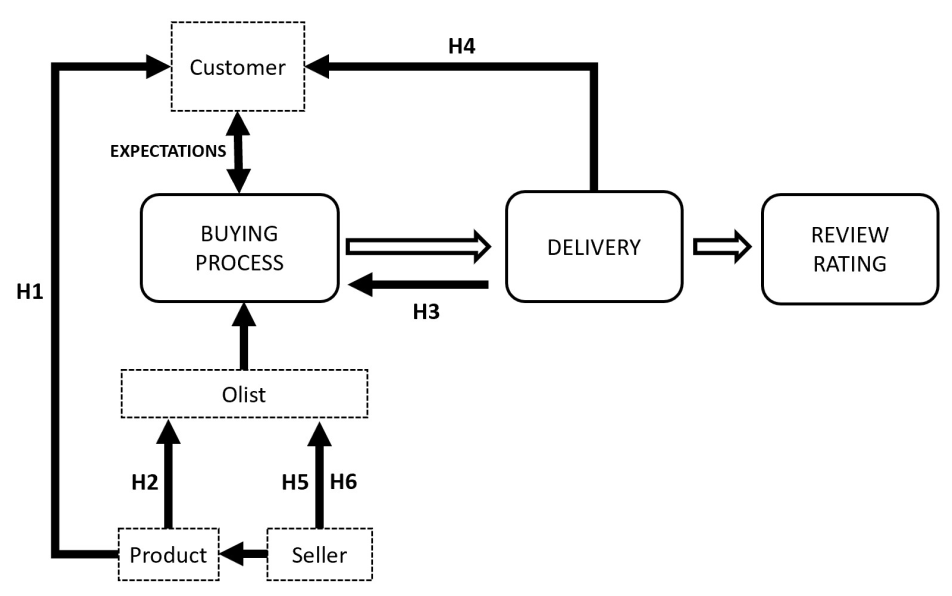

### Research Methodology:

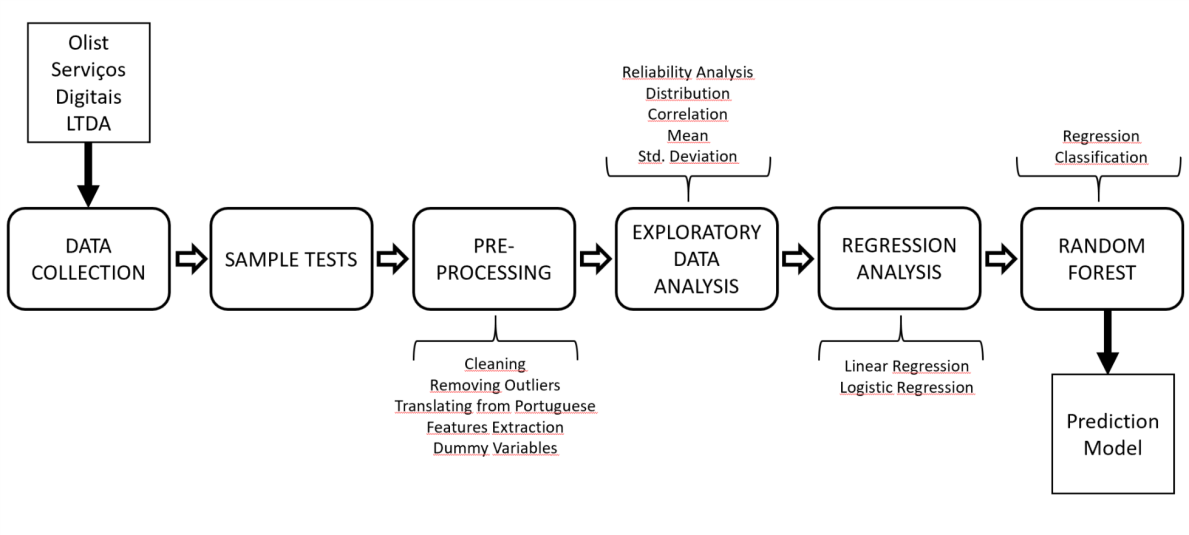



# 1. Data Cleaning and Preprocessing

The data set information was collected from about 100,000 orders made through a Brazilian marketplace called Olist from 2016 to 2018. Olist, besides having its own e-commerce, registers its sellers in a system that connects to other large e-commerce in Brazil, such as Amazon, Carrefour and Mercado Livre (Olist Serviços Digitais Ltda, 2016-2018).
It is a public data set, provided by Olist itself through an Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0) license of use, and available at the online data scientists community Kaggle, owned by Google LLC. At the time of this dissertation, the database is in its Version 7, and it was last updated on November 29, 2018.

### Database schema
(Olist Serviços Digitais Ltda, 2016-2018)

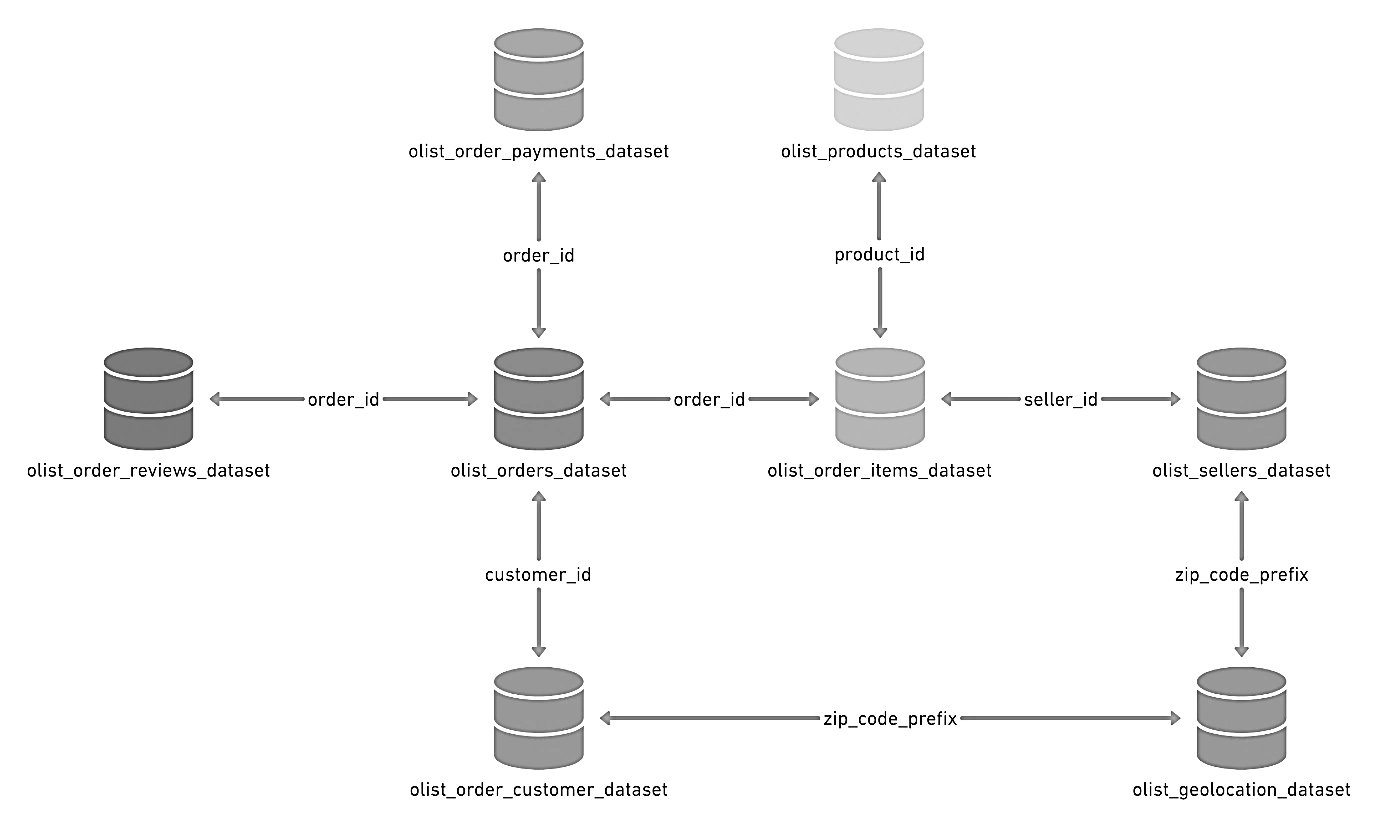

All features’ One-Sample T-test had p-value > 0.05, and therefore, we accept the null hypothesis that the sample mean is not significantly different from the population mean. It should be noted here that it was challenging to find a normal distribution within most features, including those extracted for this study.

Several highly significant Tests of Normality (both Kolmogorov-Smirnov and Shapiro-Wilk) were performed, with Q-Q chart points tending to pull away from the line that provides the expected normal distribution, indicating that the features are not normally distributed.

##### The first step was to merge the original data set with a parallel set called product_category_name_english, and then replace the information from the original category feature, to translate product categories into English. Being a Brazilian company, the original data was in Portuguese.

In [6]:
# dataframe whith translations

translation.head(20) 

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [7]:
# replacing category names with respective translations

df = df.merge(translation, on='product_category_name').drop('product_category_name', axis=1)

In [8]:
# replacing the underlines in product_category_name_english column with spaces

df['product_category_name_english'] = df['product_category_name_english'].str.replace('_', ' ').str.lower()

df['product_category_name_english'].value_counts().head(20)

bed bath table              10435
health beauty                7939
sports leisure               7832
furniture decor              7728
watches gifts                7130
computers accessories        6329
housewares                   6230
garden tools                 4570
cool stuff                   4315
toys                         4114
perfumery                    3823
auto                         3244
telephony                    3108
fashion bags accessories     2809
baby                         2364
stationery                   1945
pet shop                     1909
electronics                  1687
office furniture             1685
consoles games               1098
Name: product_category_name_english, dtype: int64


#### Now change the index and drop / adjust the columns



In [9]:
df.index = df['order_id'] # creates the order_id index
df.drop('order_id', axis=1, inplace=True) # erases order_id old column

In [10]:
df.head() # checking if it went well

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_id,...,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english
order_id,,,,,,,,,,,,,,,,,,,,,
b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,297dcf281305aabfee256d313076af2b,...,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00,health beauty
e98077a0d199a25a40eab3b14cc230d4,delivered,39.99,15.23,1,2,2018-04-17 13:25:36.000000,2018-04-18 13:31:35.349522,2018-05-10 00:00:00.000000,2018-04-27 20:56:32.787589,5161d5feec98ade754f67746caf8e0c9,...,405,2,190d9562bfbe9d3ed876c2ac6f2f5894,e98077a0d199a25a40eab3b14cc230d4,5,NaN,NaN,2018-04-28 00:00:00.000000,2018-04-29 21:07:53+00:00,health beauty
8a723730400b508cbf47fbef4a76ec8e,delivered,60.00,20.91,1,1,2018-02-18 12:41:01.000000,2018-02-18 13:46:36.606696,2018-03-14 00:00:00.000000,2018-03-03 02:48:53.603256,f19376e0c54da9409485f7ef9556d367,...,1665,1,5858f45c20fde7d7e49af37a2166635a,8a723730400b508cbf47fbef4a76ec8e,5,NaN,muito bom cabelo fica lisinho,2018-03-04 00:00:00.000000,2018-03-07 02:53:50+00:00,health beauty
cf71b9b6b7ed12d72f541b0420023f19,delivered,79.99,10.94,1,1,2018-05-09 23:33:28.000000,2018-05-11 02:57:52.916830,2018-05-24 00:00:00.000000,2018-05-17 22:31:58.137648,12698ad9da6b62003811594de0ae297e,...,492,3,2b4609f8948be18874494203496bc318,cf71b9b6b7ed12d72f541b0420023f19,4,Bom,gostei,2018-05-18 00:00:00.000000,2018-05-20 19:47:57+00:00,health beauty
93ef9253c47e7dfc633c01f728488cb1,delivered,58.99,11.73,1,1,2017-10-26 09:07:04.000000,2017-10-27 09:15:12.032978,2017-11-09 00:00:00.000000,2017-10-31 16:09:47.272654,ba21875fac3c41b6ac433113cf862e55,...,492,2,7c1bd920dbdf22470b68bde975dd3ccf,93ef9253c47e7dfc633c01f728488cb1,4,NaN,NaN,2017-11-01 00:00:00.000000,2017-11-03 20:37:36+00:00,health beauty


Then the features not useful to test the research’s hypotheses were eliminated, and the others were converted into more appropriate formats (ratings into ordinal form, timestamps into DateTime, strings into categorical and numbers into integers/floats). The third step was the cleaning itself, where blank data was deleted. Duplicate data were not found, and processes of regularisation, standardisation, or normalisation were not required at this moment.

In [11]:
# drop useless columns

df.drop(['customer_city', 'customer_state', 'customer_zip_code_prefix', 'review_comment_title', 'review_comment_message' ], axis=1, inplace=True)

In [12]:
# convert all columns with date info into the correct datetime format

df.order_purchase_timestamp = pd.to_datetime(df.order_purchase_timestamp)
df.order_aproved_at = pd.to_datetime(df.order_aproved_at)
df.order_estimated_delivery_date = pd.to_datetime(df.order_estimated_delivery_date)
df.order_delivered_customer_date = pd.to_datetime(df.order_delivered_customer_date)
df.review_creation_date = pd.to_datetime(df.review_creation_date)
df.review_answer_timestamp = pd.to_datetime(df.review_answer_timestamp)

In [13]:
df.info() # checking if it went well

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, b95df3cef5297e79ef709ba256518f6f to a1e669675b45abe7edd5da0ff226e26b
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype              
---  ------                         --------------   -----              
 0   order_status                   100000 non-null  object             
 1   order_products_value           100000 non-null  float64            
 2   order_freight_value            100000 non-null  float64            
 3   order_items_qty                100000 non-null  int64              
 4   order_sellers_qty              100000 non-null  int64              
 5   order_purchase_timestamp       100000 non-null  datetime64[ns]     
 6   order_aproved_at               99982 non-null   datetime64[ns]     
 7   order_estimated_delivery_date  100000 non-null  datetime64[ns]     
 8   order_delivered_customer_date  97595 non-null   datetime64[ns]     
 9   customer_id                  

In [14]:
# drop blank values

df = df.dropna(how='any',axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97578 entries, b95df3cef5297e79ef709ba256518f6f to a1e669675b45abe7edd5da0ff226e26b
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   order_status                   97578 non-null  object             
 1   order_products_value           97578 non-null  float64            
 2   order_freight_value            97578 non-null  float64            
 3   order_items_qty                97578 non-null  int64              
 4   order_sellers_qty              97578 non-null  int64              
 5   order_purchase_timestamp       97578 non-null  datetime64[ns]     
 6   order_aproved_at               97578 non-null  datetime64[ns]     
 7   order_estimated_delivery_date  97578 non-null  datetime64[ns]     
 8   order_delivered_customer_date  97578 non-null  datetime64[ns]     
 9   customer_id                    97578 non-

In [15]:
# Change the datatype of "order_status" and "product_category_name" columns from regular string to categorical variable

stat_cat = df['order_status'].unique().tolist()
df['order_status'] = pd.Categorical(df['order_status'], categories=stat_cat, ordered=False)

cat_name = df['product_category_name_english'].unique().tolist()
df['product_category_name_english'] = pd.Categorical(df['product_category_name_english'], categories=cat_name, ordered=False)


# Make ordered list of qty of photos for future viz

# ordered_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# df['product_photos_qty'] = pd.Categorical(df['product_photos_qty'], categories = ordered_list, ordered=True)
# df['product_photos_qty'].dtype

In [16]:
df.info() # checking if it went well

<class 'pandas.core.frame.DataFrame'>
Index: 97578 entries, b95df3cef5297e79ef709ba256518f6f to a1e669675b45abe7edd5da0ff226e26b
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   order_status                   97578 non-null  category           
 1   order_products_value           97578 non-null  float64            
 2   order_freight_value            97578 non-null  float64            
 3   order_items_qty                97578 non-null  int64              
 4   order_sellers_qty              97578 non-null  int64              
 5   order_purchase_timestamp       97578 non-null  datetime64[ns]     
 6   order_aproved_at               97578 non-null  datetime64[ns]     
 7   order_estimated_delivery_date  97578 non-null  datetime64[ns]     
 8   order_delivered_customer_date  97578 non-null  datetime64[ns]     
 9   customer_id                    97578 non-

In [17]:
# return sum of duplicated data 

sum(df.duplicated())

0

### Features Extraction & Attributes selection

Given the immensity of features that can be analysed through the 97,578 orders, it is essential that, in addition to the elimination of useless ones, there must be extracted new, smarter variables. Through variables combination, redundant features can be turned into more relevant data, helping the machine learning algorithm to perform faster. In addition, it can give a better idea of the hidden process and factors that underlie the raw data (Alpaydin, 2016).

The first feature extracted was delivery_est_time, which is the result of subtracting the order_estimated_delivery_date (the estimated delivery date informed by the seller) from order_purchase_timestamp (the moment which the customer made the purchase). The new feature better represents the causal evidence required to validate our H4 (the delivery time negatively influences the customer OCR score), showing the estimated time (in days) for the product to be delivered.

The second feature extracted was delivery_act_time, which is the subtraction of order_delivered_customer_date (the actual product delivery date) and order_purchase_timestamp (the moment which the customer made the purchase). Similar to the previous one, this new feature also helps validate H4 by presenting the current time it took the product to be delivered. The main difference is that, when compared to the review rating score, the first one excerpts customer satisfaction from the beginning, at the time of purchasing, and the second excerpts customer satisfaction at the endpoint, when receiving the product.

The previous two features enable a third new feature, which measures the user expectation directly, and whether it has been exceeded or not even met. The extracted delivery_precision is a subtraction of order_estimated_delivery_date and order_delivered_customer_date, and it will outputs either a positive number (the number of days the product was delivered before the estimated date, in advance) or a negative number (the number of days the product was delivered later than the estimated due date). This allows assessing whether the rating score (OCR) increases or decreases in proportion to the days’ discrete data.

However, the correlation of delay with consumer satisfaction is perhaps binary, i.e., whether there was a delay or arrived early regardless of the number of days. For this, another variable is extracted, called late, a binary delivery feature which states if the delivery was late or not. The output, therefore, is True, when the delivery was late and False when the delivery was on time.

The last feature extracted was total_value, which is nothing more than the sum of order_products_value (the total product prices of an order) and order_delivery_value (the total delivery value of an order). This new feature, while having a degree of multicollinearity with the other two, is useful during exploratory data analysis to compare with the other two, and to abstract if user satisfaction tends to depend on the total value, independent of how it was distributed between the product and the delivery.

In [18]:
# creating a feature for amount of days estimated of delivery from purchase date. The customer may be unsatisfied if 
# is too long

df['delivery_est_time'] = ((df['order_estimated_delivery_date'] - df['order_purchase_timestamp']) 
                               / (np.timedelta64(1, 'D')))

In [19]:
# creating a feature for amount of actual days of delivery from purchase date

df['delivery_act_time'] = ((df['order_delivered_customer_date'] - df['order_purchase_timestamp']) 
                               / (np.timedelta64(1, 'D')))

In [20]:
# creating a delivery precision feature

df['delivery_precision'] = ((df['order_estimated_delivery_date'] - df['order_delivered_customer_date']) 
                               / (np.timedelta64(1, 'D')))


There are, in fact, some outliers in all features. This was detected through visual analysis by boxplots and through the Z-score function, for better describing the relationship of the data with its Mean and Standard Deviation. Data points with Z-score values greater than the threshold value of 3 and lesser than -3 have been adequately eliminated, resulting in an updated data set of 89,134 orders. Both the developed Regression Analysis and Random Forest were tested with data sets with and without outliers, and in both, the performance was increased in the data set without outliers.

In [21]:
df_outliers = df[['review_score','order_products_value', 'order_freight_value', 'product_description_lenght', 'product_photos_qty', 'delivery_est_time', 'delivery_act_time', 'delivery_precision']]
df_outliers.info()


<class 'pandas.core.frame.DataFrame'>
Index: 97578 entries, b95df3cef5297e79ef709ba256518f6f to a1e669675b45abe7edd5da0ff226e26b
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   review_score                97578 non-null  int64  
 1   order_products_value        97578 non-null  float64
 2   order_freight_value         97578 non-null  float64
 3   product_description_lenght  97578 non-null  int64  
 4   product_photos_qty          97578 non-null  int64  
 5   delivery_est_time           97578 non-null  float64
 6   delivery_act_time           97578 non-null  float64
 7   delivery_precision          97578 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 6.7+ MB


In [22]:
z = np.abs(stats.zscore(df_outliers))
threshold = 3
print(np.where(z > 3))

(array([   10,    11,    22, ..., 97521, 97527, 97530], dtype=int64), array([3, 5, 7, ..., 3, 2, 5], dtype=int64))


In [23]:
df = df[(z < 3).all(axis=1)]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89134 entries, b95df3cef5297e79ef709ba256518f6f to a1e669675b45abe7edd5da0ff226e26b
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   order_status                   89134 non-null  category           
 1   order_products_value           89134 non-null  float64            
 2   order_freight_value            89134 non-null  float64            
 3   order_items_qty                89134 non-null  int64              
 4   order_sellers_qty              89134 non-null  int64              
 5   order_purchase_timestamp       89134 non-null  datetime64[ns]     
 6   order_aproved_at               89134 non-null  datetime64[ns]     
 7   order_estimated_delivery_date  89134 non-null  datetime64[ns]     
 8   order_delivered_customer_date  89134 non-null  datetime64[ns]     
 9   customer_id                    89134 non-

In [25]:
# creating a binary delivery feature which states if the delivery was late or not

df['late'] = df.order_delivered_customer_date > df.order_estimated_delivery_date

In [26]:
# creating a total value feature

df['total_value'] = df['order_products_value'].add(df['order_freight_value'])

In [27]:
# change some column names with integer values to make it easier to plot many scatter relations

df = df.rename(columns={"order_products_value": "prod_value", "order_freight_value":"delivery_value","order_sellers_qty": "sellers_qty", "order_items_qty": "items_qty", "product_name_lenght":"title_size", "product_description_lenght":"descr_size","product_photos_qty":"photos_qty" })

### Data dictionary

**To make the analysis easier**


| Variable        | Definition           | Key |
| ------------- |:-------------:| -----:|
| order_id      | Order unique identifier |  |
| order_status	      | Reference to the order status      |   delivered, shipped, etc. |
| prod_value | Total products prices of an order      |   |
| delivery_value      | Total delivery value of an order |  |
| items_qty      | Total quantity of items purchased in an order      |    |
| sellers_qty | Total quantity of sellers that fulfilled an order	      |    |
| order_purchase_timestamp      | Shows the purchase timestamp |  |
| order_aproved_at      | Shows the payment approval timestamp      |    |
| order_estimated_delivery_date      | Shows the estimated delivery date that was informed to customer at the purchase moment      |    |
| order_delivered_customer_date | Shows the actual order delivery date to the customer      |     |
| customer_id | Key to the orders dataset. Each order has a unique customer_id.      |     |
| title_size | Number of characters extracted from the purchased product name      |     |
| descr_size | Number of characters extracted from the product description.      |     |
| photos_qty | Number of product published photos      |     |
| product_id | Product unique identifier      |     |
| review_id | Unique review identifier      |    |
| review_score | Note given by the customer on a satisfaction survey      |    From 1 to 5 |
| review_creation_date | Shows the date in which the satisfaction survey was sent to the customer      |     |
| review_answer_timestamp | Shows satisfaction survey answer timestamp      |     |
| product_category_name_english | Category name in English      |     |
| delivery_est_time | amount of days estimated of delivery from purchase date      |    
| delivery_act_time | amount of actual of delivery from purchase date      |    
| delivery_precision | Difference between *order_estimated_delivery_date* and *order_delivered_customer_date*      |      > 0 (days before estimated) ; < 0 (days after estimated = late)
| late | binary delivery feature which states if the delivery was late or not      |      *True* = delivery was late ;  *False* = delivery was on time
| total_value | Sum of *order_products_value* and *order_delivery_value*      |     |
| payment_type | Method of payment chosen by the customer      |    credit_card, debit_card, voucher, boleto



In [28]:
df = df[['review_score','prod_value', 'delivery_value', 'total_value', 'descr_size', 'photos_qty', 'delivery_est_time', 'delivery_act_time', 'delivery_precision', 'late', 'product_category_name_english']]
df.info()

df.to_csv('df_nodummy.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 89134 entries, b95df3cef5297e79ef709ba256518f6f to a1e669675b45abe7edd5da0ff226e26b
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   review_score                   89134 non-null  int64   
 1   prod_value                     89134 non-null  float64 
 2   delivery_value                 89134 non-null  float64 
 3   total_value                    89134 non-null  float64 
 4   descr_size                     89134 non-null  int64   
 5   photos_qty                     89134 non-null  int64   
 6   delivery_est_time              89134 non-null  float64 
 7   delivery_act_time              89134 non-null  float64 
 8   delivery_precision             89134 non-null  float64 
 9   late                           89134 non-null  bool    
 10  product_category_name_english  89134 non-null  category
dtypes: bool(1), category(1), float64(6), int

In [29]:
df.head()

,review_score,prod_value,delivery_value,total_value,descr_size,photos_qty,delivery_est_time,delivery_act_time,delivery_precision,late,product_category_name_english
order_id,,,,,,,,,,,
b95df3cef5297e79ef709ba256518f6f,5,349.90,13.84,363.74,625,1,42.278461,5.739851,36.538609,False,health beauty
e98077a0d199a25a40eab3b14cc230d4,5,39.99,15.23,55.22,405,2,22.440556,10.313157,12.127398,False,health beauty
8a723730400b508cbf47fbef4a76ec8e,5,60.00,20.91,80.91,1665,1,23.471516,12.588803,10.882713,False,health beauty
cf71b9b6b7ed12d72f541b0420023f19,4,79.99,10.94,90.93,492,3,14.018426,7.957293,6.061133,False,health beauty
93ef9253c47e7dfc633c01f728488cb1,4,58.99,11.73,70.72,492,2,13.620093,5.293556,8.326536,False,health beauty


# 2. Exploratory Data Analysis

In [30]:
# returns some info, but not so useful now

df.describe(include='all') 

,review_score,prod_value,delivery_value,total_value,descr_size,photos_qty,delivery_est_time,delivery_act_time,delivery_precision,late,product_category_name_english
count,89134.000000,89134.000000,89134.000000,89134.00000,89134.000000,89134.000000,89134.000000,89134.000000,89134.000000,89134,89134
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,69
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,bed bath table
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83686,9859
mean,4.153039,108.289008,19.574192,127.86320,705.766161,2.163742,23.737868,11.905957,11.831911,NaN,NaN
std,1.275856,99.326608,11.581964,103.97081,518.242886,1.501779,7.841417,7.176545,7.927986,NaN,NaN
min,1.000000,2.290000,0.000000,7.43000,8.000000,1.000000,2.001238,0.533416,-19.068632,NaN,NaN
25%,4.000000,45.000000,13.370000,60.22250,333.000000,1.000000,19.056068,6.885480,7.195451,NaN,NaN
50%,5.000000,79.900000,16.390000,97.76000,573.000000,2.000000,23.297199,10.247657,12.181528,NaN,NaN
75%,5.000000,138.000000,21.710000,160.19750,920.000000,3.000000,28.401317,15.201252,16.317020,NaN,NaN


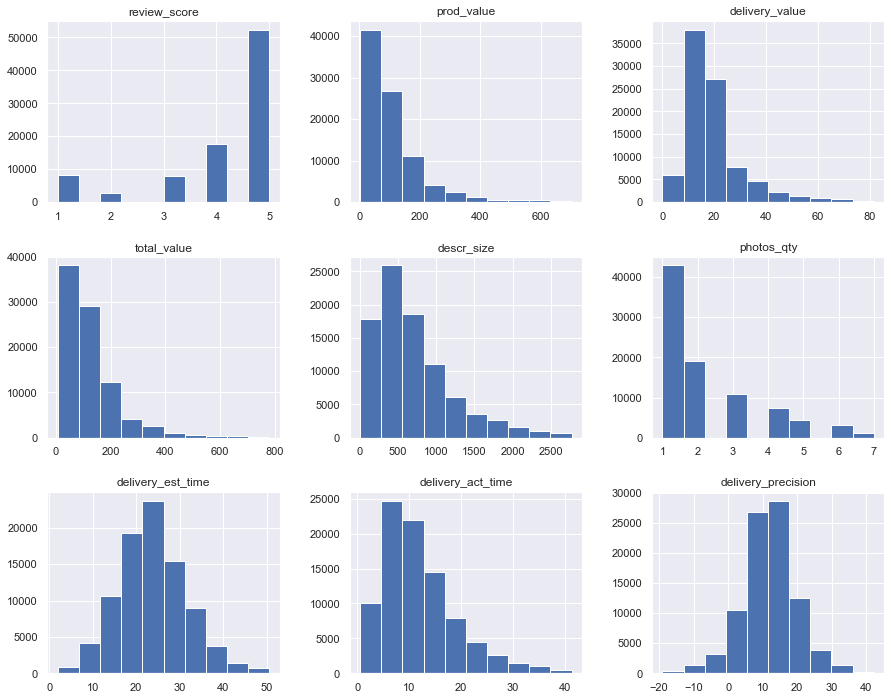

In [31]:
exclude = ['late']

df[['review_score','prod_value', 'delivery_value', 'total_value', 'descr_size', 'photos_qty', 'delivery_est_time', 'delivery_act_time', 'delivery_precision']].hist(figsize=(15,12), xlabelsize=(11)); 

# returns histograms of available numerical data

Through the process of data analysis, data is collected and analysed to answer questions, test hypotheses, or disprove theories (Judd & McClelland, 1989). 

Two Reliability Analysis for detecting multi-correlating features were performed for the extraction of a Cronbach’s α (alpha), which helps to measure internal consistency and uni-dimensionality (Tavakol & Dennick, 2011). The first included the variables prod_value, delivery_value and total_value, and the second included delivery_est_time, delivery_act_time, and delivery_precision. The goal was to understand if a dimension reduction through Factor Analysis would be useful to extract some set of hidden variables explaining their relationship. The first test group resulted in a Cronbach value greater than 0.7, meaning the variables have a high correlation. 

A Factor Analysis was performed and extracted two components, which one of them with an eigenvalue explaining 75% of the relationship (basically representing prod_value and total_value). The high correlation, although ignored at the moment, showed that one of these variables should be excluded from the Regression Analysis ahead. The second test group resulted in a Cronbach value of less than 0.7, which is treated as a low correlation between variables (Tavakol & Dennick, 2011).

The purpose of the research’s exploratory data analysis (EDA) is not to understand the entire data set, but only the feature’s correlations with the dependent variable online customer rating (OCR). Scatterplot, boxplot, value distributions by Review Score’s means and analysis of variance (ANOVA) were used for this purpose through Python groupby and describe functions, IBM SPSS statistical software, and Tableau for data visualisation.


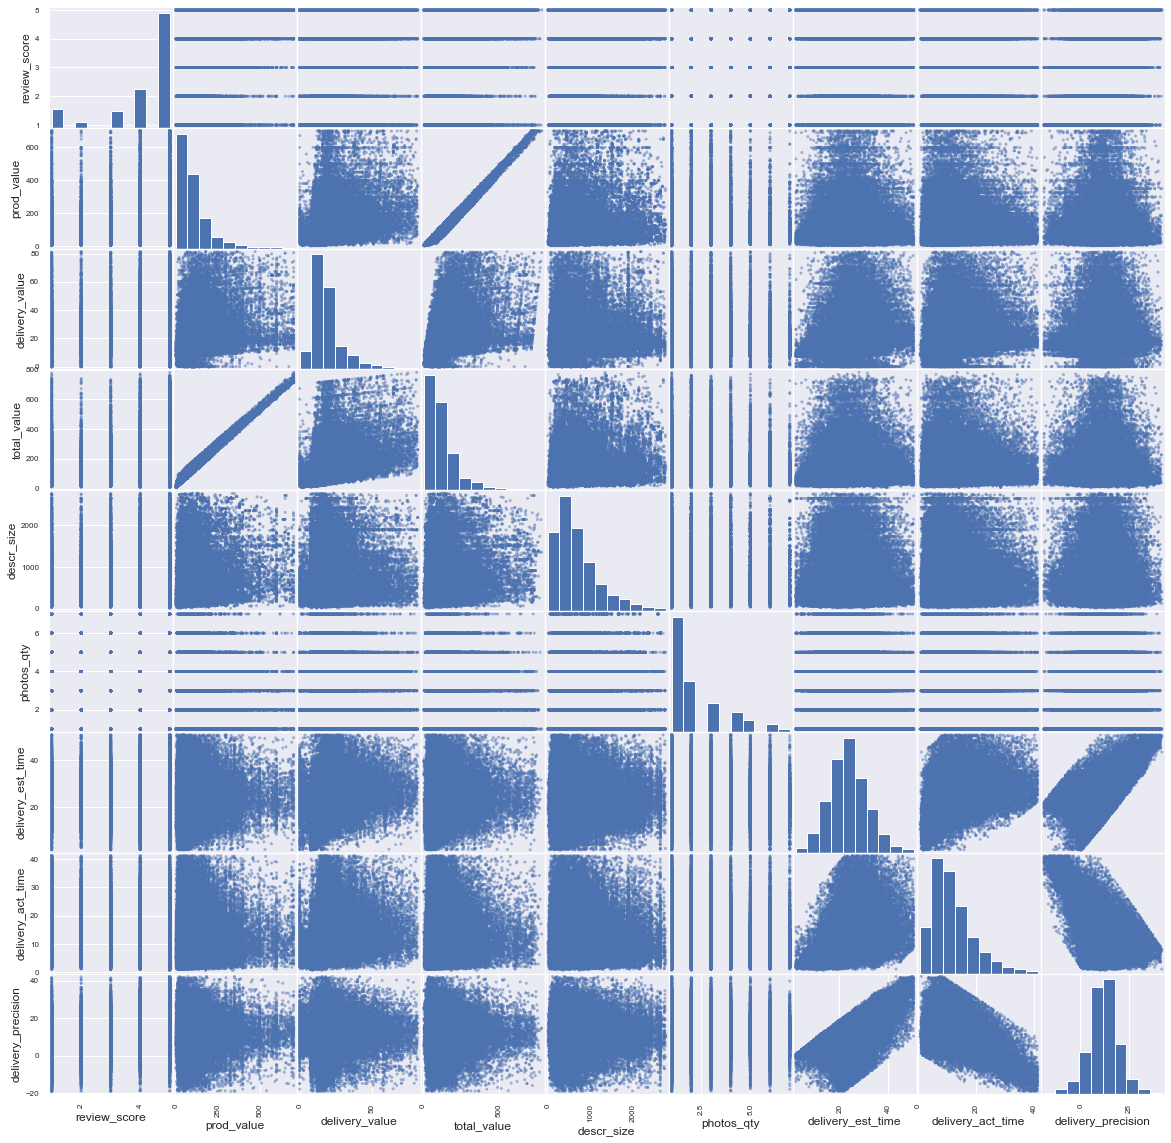

In [32]:
# return a scatter matrix correlating the factors
pd.plotting.scatter_matrix(df[['review_score','prod_value', 'delivery_value', 'total_value', 'descr_size', 'photos_qty', 'delivery_est_time', 'delivery_act_time', 'delivery_precision']], figsize=(20,20));

# Review Rating Score

In [33]:
# what's the distribution of reviews

df['review_score'].value_counts().sort_index()

1     8394
2     2863
3     7816
4    17696
5    52365
Name: review_score, dtype: int64

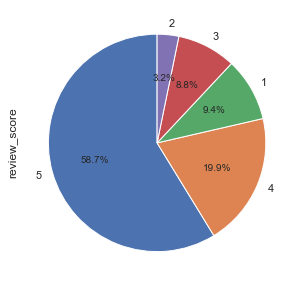

In [34]:
df['review_score'].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.1f%%', 
 startangle=90);


Left-squewed = more people vote positively

In [35]:
df['review_score'].describe()

count    89134.000000
mean         4.153039
std          1.275856
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

C:\Users\tulio\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\tulio\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


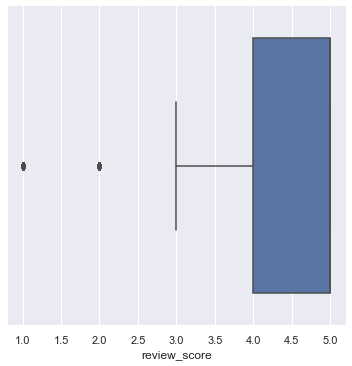

In [36]:
# outliers

ax = sns.catplot(x="review_score", kind="box",
                 data=df, orient='v')

# Categories

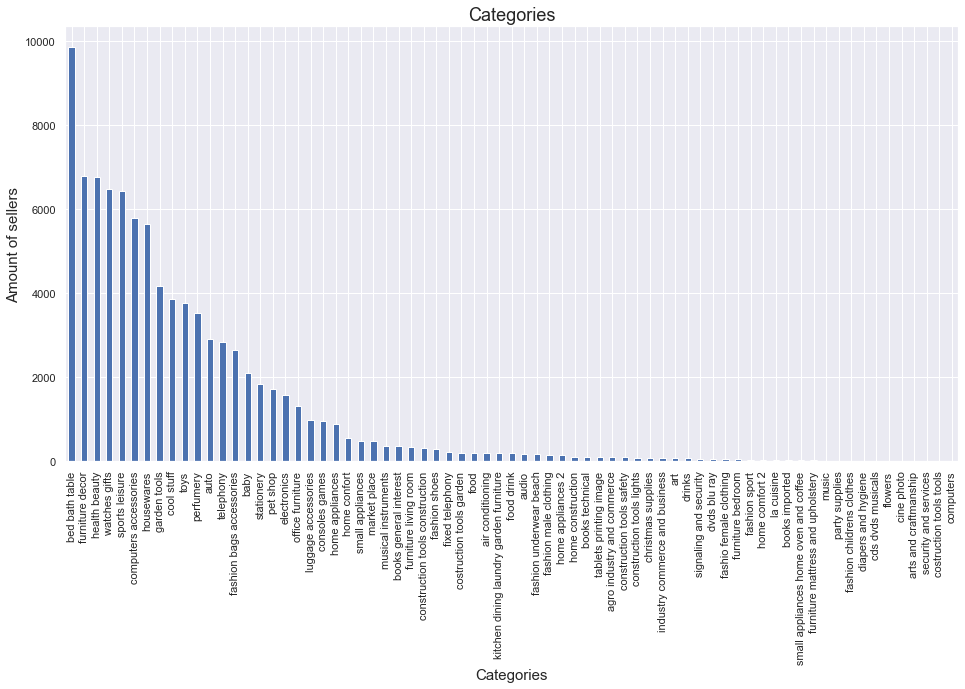

In [37]:
df['product_category_name_english'].value_counts().plot(kind='bar', figsize=(16,8)); # retorna gráfico de barras das amostras da coluna 'embarked'
plt.title('Categories', fontsize=18) # define o titulo
plt.xlabel("Categories", fontsize=15) # define legenda do eixo x
plt.ylabel("Amount of sellers", fontsize=15); # define legenda do eixo y

In [38]:
df['product_category_name_english'].nunique() # Total number of categories

69

## *Categories vs Reviews*

#### Mean Review Score per Category

In [39]:
(df.groupby('product_category_name_english')[['review_score']].describe()).sort_values(by=('review_score','mean'), ascending=False)

review_score                                     \
                                     count      mean       std  min  25%  50%   
product_category_name_english                                                   
fashion childrens clothes             14.0  4.857143  0.363137  4.0  5.0  5.0   
cds dvds musicals                     12.0  4.833333  0.389249  4.0  5.0  5.0   
music                                 14.0  4.785714  0.801784  2.0  5.0  5.0   
diapers and hygiene                   13.0  4.692308  0.480384  4.0  4.0  5.0   
art                                   73.0  4.616438  0.792852  1.0  4.0  5.0   
...                                    ...       ...       ...  ...  ...  ...   
arts and craftmanship                  7.0  3.571429  1.902379  1.0  2.0  5.0   
flowers                                9.0  3.222222  1.787301  1.0  1.0  4.0   
security and services                  2.0  3.000000  2.828427  1.0  2.0  3.0   
costruction tools tools                0.0       NaN       NaN  NaN  NaN  NaN   
computers                              0.0       NaN       NaN  NaN  NaN  NaN   

                                         
                               75%  max  
product_category_name_english            
fashion childrens clothes      5.0  5.0  
cds dvds musicals              5.0  5.0  
music                          5.0  5.0  
diapers and hygiene            5.0  5.0  
art                            5.0  5.0  
...                            ...  ...  
arts and craftmanship          5.0  5.0  
flowers                        5.0  5.0  
security and services          4.0  5.0  
costruction tools tools        NaN  NaN  
computers                      NaN  NaN  

[71 rows x 8 columns]

<AxesSubplot:ylabel='product_category_name_english'>

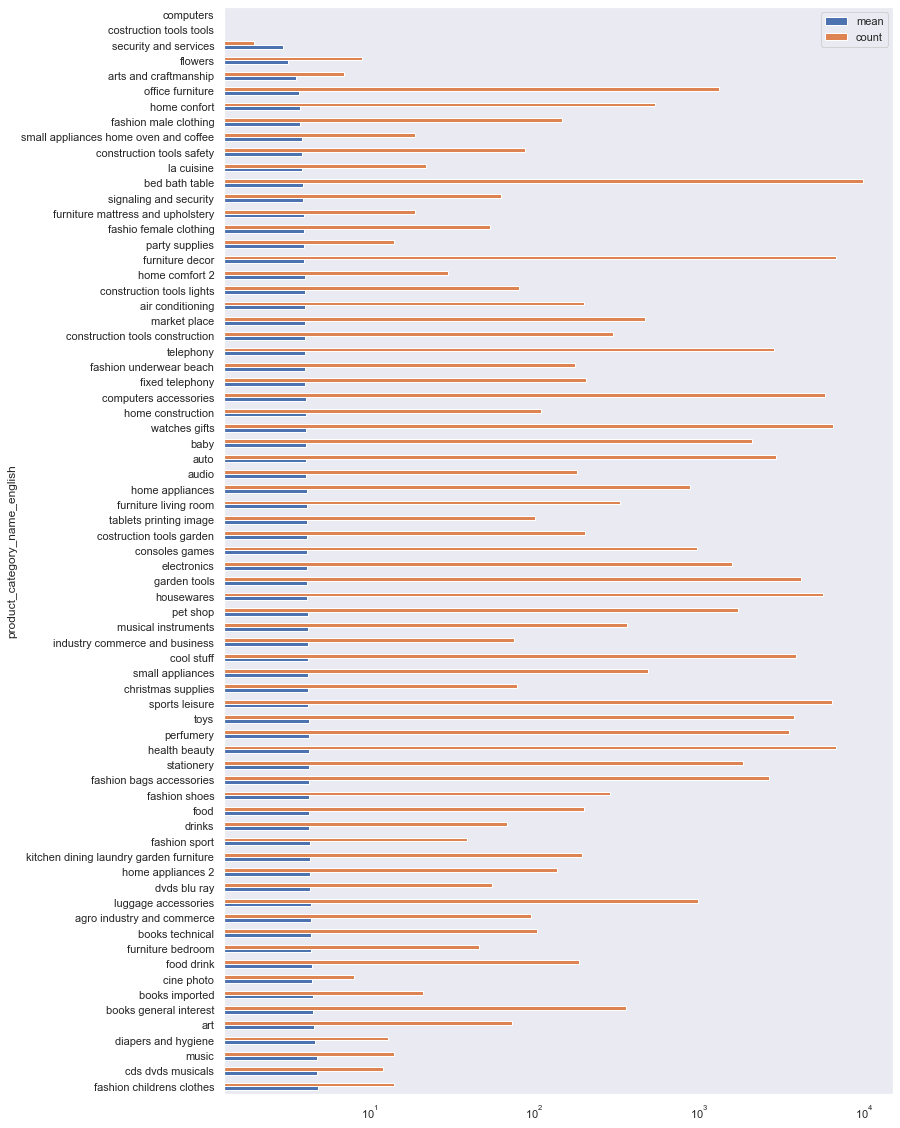

In [40]:
category_grouped = (df.groupby('product_category_name_english')[['prod_value', 'review_score']]
                             .agg({'review_score': ['mean', 'count'], 'prod_value':['mean']})
                ).sort_values(by=('review_score','mean'), ascending=False)

category_grouped['review_score'].plot(kind='barh', figsize=(12,20), logx=True, grid=False)

From the chart above, it can be seen that orders within the categories: books, arts, diapers and hygiene, music, cds & dvds musicals and fashion children clothes have a higher OCR’s mean average, while orders related to security & services, flowers, arts & craftmanship, and office furniture have a lower mean.
Product category is a variable subdivided into 72 categories, being indispensable to appraise not only its OCR’s mean average but the number of orders within each category, which may or may not embody enough sample magnitude for statistical investigation.
The most purchased categories and, therefore, most reliable for analysing the rating’s mean average were bed bath table, furniture decor, telephony, computer accessories, watches gifts, auto, garden tools, cool stuff, sports leisure, toys, perfumery and health beauty, represented by the darker tones in the graph below.

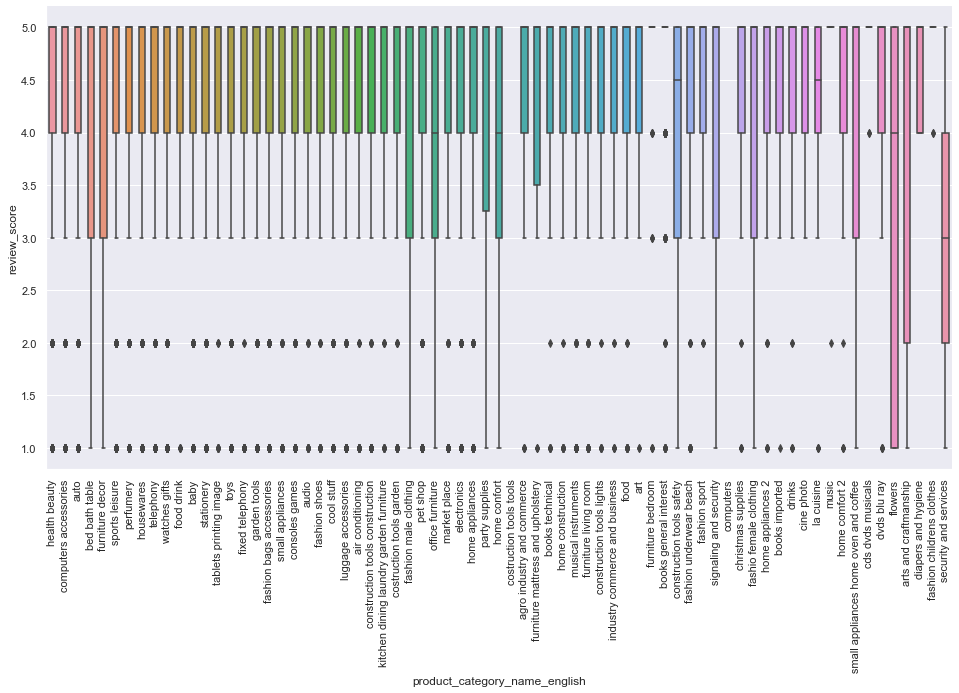

In [41]:
ax = sns.catplot(x="product_category_name_english", y="review_score", kind="box",
                 data=df[df.review_score < 60], height=7, width=0.5, aspect=2)
ax.set_xticklabels(rotation=90)

In [42]:
# creating an aggregation
avg_score_per_category = df.groupby('product_category_name_english', as_index=False).agg({'review_score': ['count', 'mean']})
avg_score_per_category.columns = ['product_category_name_english', 'count', 'mean']

# filtering to show only categories with more than 100 reviews
avg_score_per_category = avg_score_per_category[avg_score_per_category['count'] > 100]
avg_score_per_category = avg_score_per_category.sort_values(by='mean', ascending=False)
avg_score_per_category

,product_category_name_english,count,mean
48,books general interest,361,4.551247
10,food drink,186,4.494624
39,books technical,104,4.403846
23,luggage accessories,985,4.387817
56,home appliances 2,138,4.376812
26,kitchen dining laundry garden furniture,194,4.360825
45,food,201,4.313433
21,fashion shoes,288,4.298611
17,fashion bags accessories,2641,4.287012
12,stationery,1837,4.280893


# Price

C:\Users\tulio\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\tulio\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


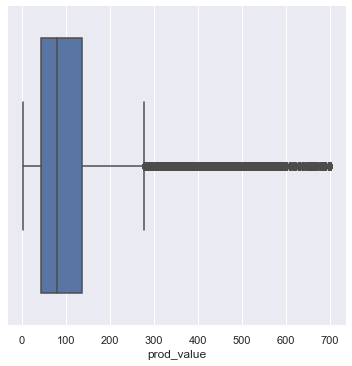

In [43]:
# outliers

ax = sns.catplot(x="prod_value", kind="box",
                 data=df, orient='v')

C:\Users\tulio\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-66.18110291398995, 769.37110291399)

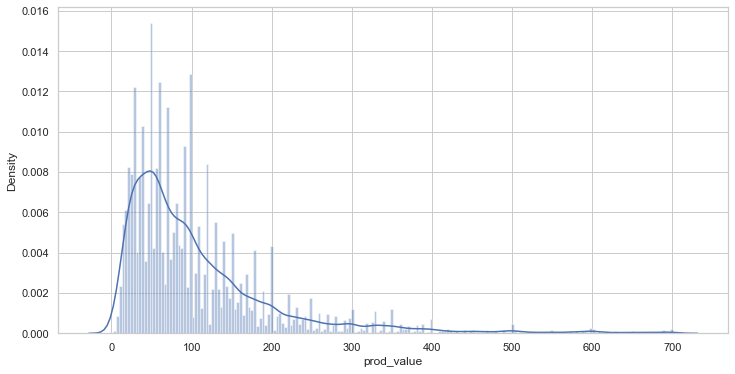

In [44]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.distplot(df['prod_value'], bins=200, kde=True, color='b')
plt.xlim()

## *Price vs Reviews*

As for the relationship between reviews and product prices, it is relatively challenging to see a pattern that the price might have had with the OCR rated by the customer. This behaviour was expected by the low coefficient of correlation shown in the heatmap earlier. In contrast, there is a linear relationship between delivery value and review score, which is indirectly proportional, as the following graph shows.

In [45]:
(df.groupby('review_score')[['prod_value']].describe()).sort_values(by=('prod_value','mean'), ascending=False)

prod_value                                                      \
                  count        mean         std   min     25%    50%    75%   
review_score                                                                  
1                8394.0  111.311866  101.077888  3.90  48.000  84.00  139.9   
5               52365.0  109.406772  100.809534  2.29  44.990  79.90  139.0   
4               17696.0  106.718935   98.324729  3.99  45.000  79.00  134.2   
2                2863.0  103.893158   91.509955  4.50  45.000  79.79  135.0   
3                7816.0  102.718864   91.859014  3.90  44.765  78.00  129.9   

                      
                 max  
review_score          
1             700.90  
5             700.00  
4             700.00  
2             699.99  
3             699.00

#### Correlation between means of Product Value (Y) and Review Score (X)

The highest product average price (BR 111.31) is assigned to orders rated as 1-star, whereas the second-highest (BR 109.41) is assigned straight to orders with 5-stars, with the lowest average price (BR 102.72) being related to 3-stars rating. The relationship is apparently not linear. However, both the lowest and the highest price present in orders with 1-star are higher than all other lowest/highest in the remaining scores, as well as the average values of 25, 50% and 75% from their distributions. It means that, even though the relationship is not linear, customers who are buying more expensive products might be more rigorous, and their expectations more sensible to being broken. The mean average of the delivery price assigned to 1-star orders is BR 21.31 and, as it decreases, it moves to a higher OCR, reaching BR 19.15 in 5-stars orders. The 50%, 75%, and maximum price also follow this pattern, although the maximum value present in the entire data set is, interestingly, in a 5-stars order, and the lowest maximum value in a 1-star order.


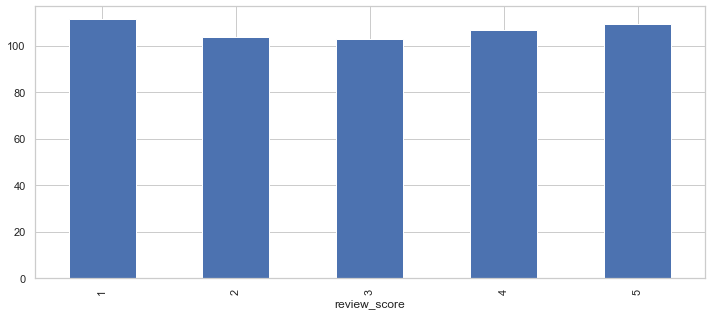

In [46]:
df.groupby('review_score')['prod_value'].mean().plot(kind='bar',figsize=(12,5));

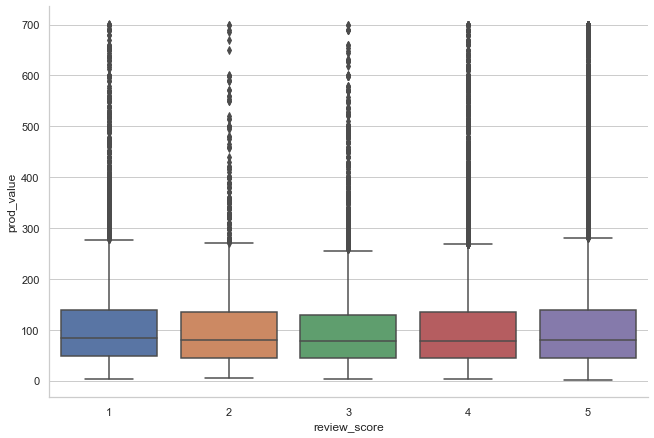

In [47]:
ax = sns.catplot(x="review_score", y="prod_value", kind="box",
                 data=df, height=6, aspect=1.5)

Scores are usually good and the bad ones seems to be related to slightly more expensive products (or larger orders).

(-91.7381024957095, 796.2281024957095)

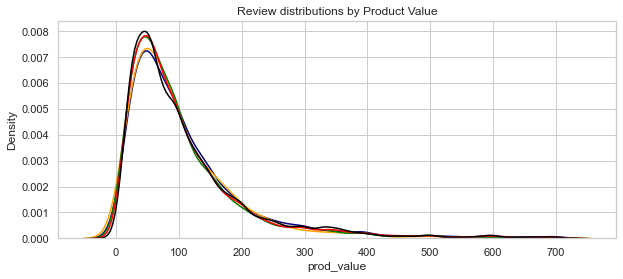

In [48]:
plt.figure(figsize=(10,4))
plt.title("Review distributions by Product Value")
p1 = sns.kdeplot(df[df.review_score == 1]['prod_value'], color="navy", label='1 Star')
p2 = sns.kdeplot(df[df.review_score == 2]['prod_value'], color="orange", label='2 Stars')
p3 = sns.kdeplot(df[df.review_score == 3]['prod_value'], color="green", label='3 Stars')
p4 = sns.kdeplot(df[df.review_score == 4]['prod_value'], color="red", label='4 Stars')
p4 = sns.kdeplot(df[df.review_score == 5]['prod_value'], color="black", label='5 Stars')
plt.xlim()

# Delivery Price

C:\Users\tulio\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\tulio\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


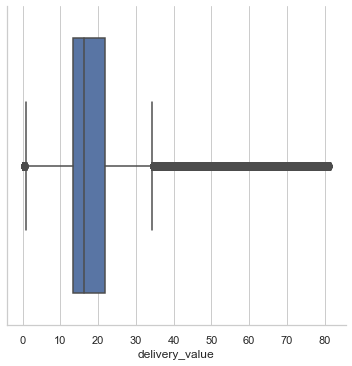

In [49]:
# outliers

ax = sns.catplot(x="delivery_value", kind="box",
                 data=df, orient='v')

C:\Users\tulio\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-7.983997026508788, 89.44399702650878)

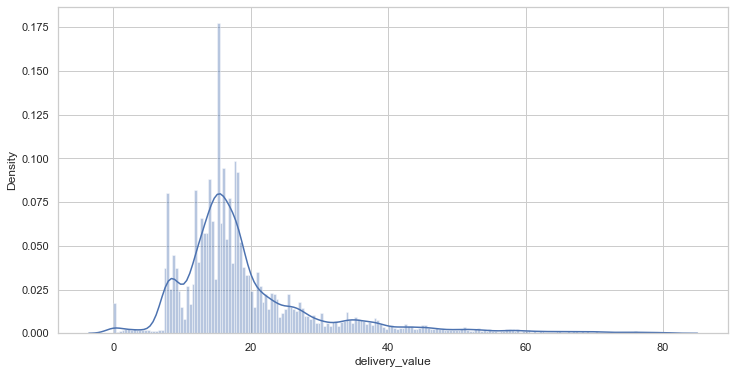

In [50]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.distplot(df['delivery_value'], bins=200 ,kde=True, color='b')
plt.xlim()

## *Delivery Price vs Reviews*

In [51]:
(df.groupby('review_score')[['delivery_value']].describe()).sort_values(by=('delivery_value','mean'), ascending=False)

delivery_value                                                   \
                      count       mean        std  min    25%    50%     75%   
review_score                                                                   
1                    8394.0  21.306923  13.526162  0.0  13.69  17.19  25.220   
2                    2863.0  20.327929  12.505931  0.0  13.37  16.79  23.405   
3                    7816.0  20.035477  11.892633  0.0  13.51  16.60  22.380   
4                   17696.0  19.694140  11.347185  0.0  13.49  16.58  21.890   
5                   52365.0  19.145844  11.185249  0.0  13.10  16.19  21.150   

                     
                max  
review_score         
1             80.75  
2             81.42  
3             81.07  
4             81.43  
5             81.46

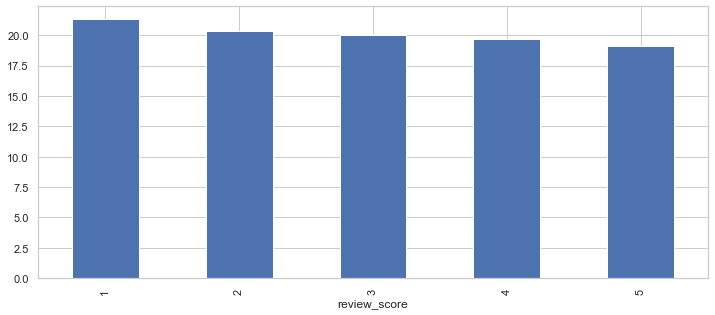

In [52]:
df.groupby('review_score')['delivery_value'].mean().plot(kind='bar',figsize=(12,5));

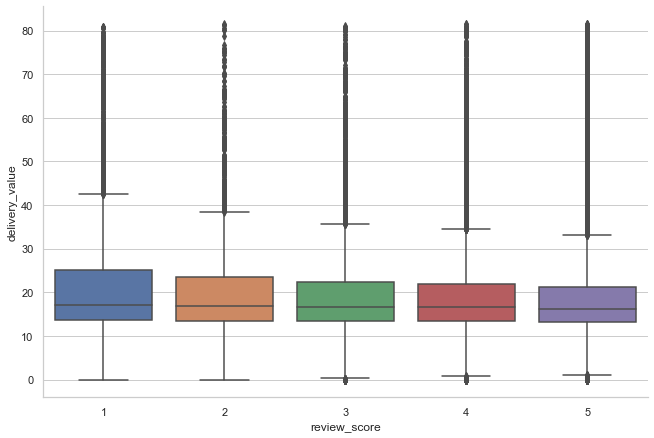

In [53]:
ax = sns.catplot(x="review_score", y="delivery_value", kind="box",
                 data=df, height=6, aspect=1.5)

# Delivery Time and Precision (Delta)

C:\Users\tulio\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\tulio\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


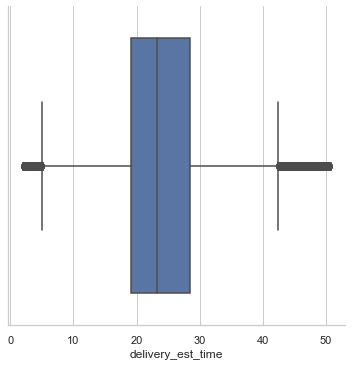

In [54]:
# outliers

ax = sns.catplot(x="delivery_est_time", kind="box",
                 data=df, orient='v')

C:\Users\tulio\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-3.0776249047211284, 55.699580923239644)

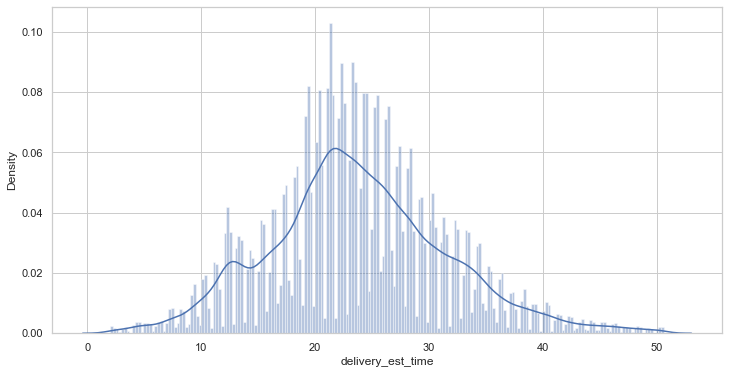

In [55]:
# estimated delivery time

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.distplot(df['delivery_est_time'], bins=200 ,kde=True, color='b')
plt.xlim()

C:\Users\tulio\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\tulio\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


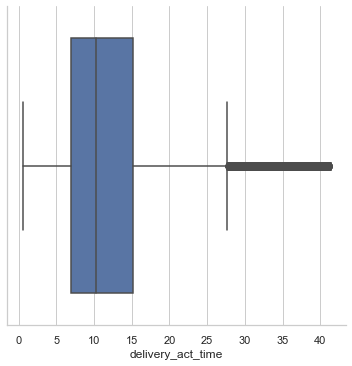

In [56]:
# outliers

ax = sns.catplot(x="delivery_act_time", kind="box",
                 data=df, orient='v')

C:\Users\tulio\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-3.9285254790259967, 45.76667838370192)

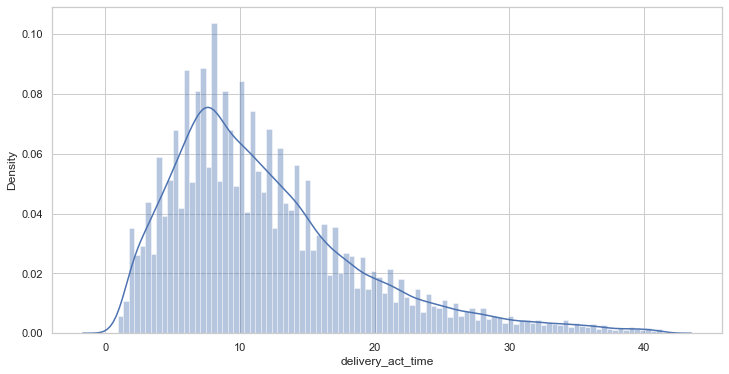

In [57]:
# actual delivery time

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.distplot(df['delivery_act_time'], bins=100 ,kde=True, color='b')
plt.xlim()

C:\Users\tulio\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\tulio\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


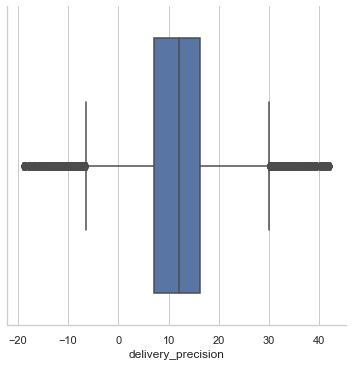

In [58]:
# outliers

ax = sns.catplot(x="delivery_precision", kind="box",
                 data=df, orient='v')

C:\Users\tulio\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-24.809144854374853, 47.939696992291516)

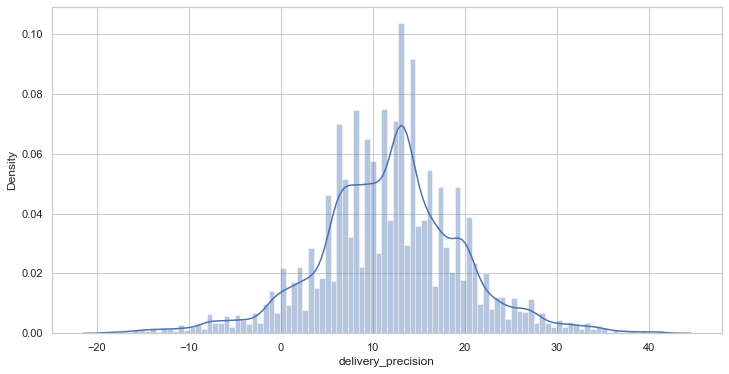

In [59]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.distplot(df['delivery_precision'], bins=100 ,kde=True, color='b')
plt.xlim()

Negative numbers = late

## *Delivery Time and Precision vs Reviews*

As for the relationship between reviews and delivery time, it is possible to see much more clearly that both the current average delivery time (represented by the variable delivery_act_time) and the average delivery precision (delivery_precision) influence the score attributed by the consumer, as explained by the higher coefficient of correlation calculated before. Estimated time is not represented here because it has a lower correlation, possibly meaning that the time expected to be delivered doesn’t impact much at the time of purchase, only after it, while waiting for the real delivery. It is clear, indeed, that low review scores concentrate more late orders than the high scores, as the graphs below show.


In [60]:
(df.groupby('review_score')[['delivery_est_time']].describe()).sort_values(by=('delivery_est_time','mean'), ascending=False)

delivery_est_time                                            \
                         count       mean       std       min        25%   
review_score                                                               
3                       7816.0  24.185297  7.707436  2.001238  19.359144   
1                       8394.0  24.184032  7.539723  2.053056  19.519172   
2                       2863.0  24.148893  7.889303  2.931852  19.362535   
4                      17696.0  24.101239  7.863361  2.084363  19.239864   
5                      52365.0  23.454297  7.886287  2.003472  18.440556   

                                               
                    50%        75%        max  
review_score                                   
3             23.942442  29.094355  50.592847  
1             23.553125  28.481829  50.574363  
2             23.529062  28.635208  50.472153  
4             23.460150  28.665058  50.575104  
5             23.132465  28.238067  50.620718

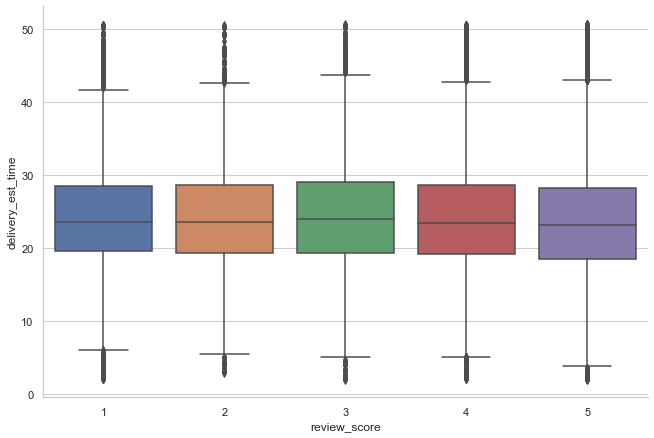

In [61]:
ax = sns.catplot(x="review_score", y="delivery_est_time", kind="box",
                 data=df, height=6, aspect=1.5)

In [62]:
(df.groupby('review_score')[['delivery_act_time']].describe()).sort_values(by=('delivery_act_time','mean'), ascending=False)

delivery_act_time                                            \
                         count       mean        std       min       25%   
review_score                                                               
1                       8394.0  16.630809  10.210032  1.066366  8.286327   
2                       2863.0  14.352492   8.723796  1.150016  7.700990   
3                       7816.0  13.548218   7.811485  0.855320  7.774555   
4                      17696.0  12.147981   6.710866  0.998388  7.190730   
5                      52365.0  10.687900   6.054892  0.533416  6.302065   

                                               
                    50%        75%        max  
review_score                                   
1             13.931447  24.169871  41.294750  
2             12.101017  19.671678  41.153419  
3             11.975313  17.964974  41.299269  
4             10.899253  15.788980  41.304737  
5              9.438819  13.903969  41.250256

The mean average of the delivery actual time assigned to 1-star orders is 16.63 days, and as it decreases, it moves to a higher OCR, reaching 10.69 days in 5 stars. The minimum and maximum days also change, reaching 0.53 day in 5-stars reviews and 1.07 days in 1-star reviews. The relationship of the OCR with delivery precision is reversed, where the mean average of a product being delivered in advance is 12.77 days in 5-stars reviews and 7.55 days 1-star reviews. However, in all ratings there are delays, reaching the maximum of 18.92 days late in 5-stars reviews and 19.07 in 1-star review.

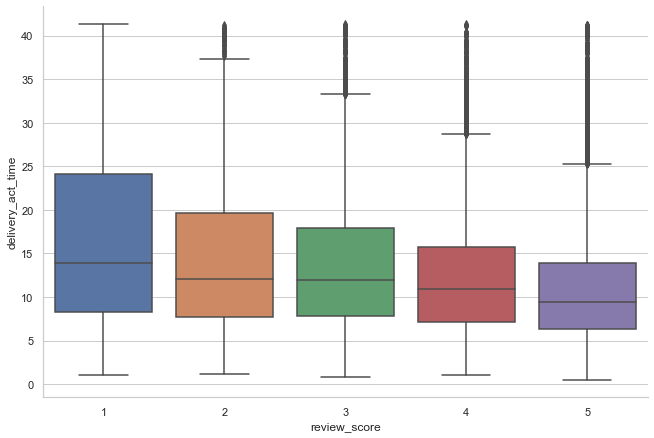

In [63]:
ax = sns.catplot(x="review_score", y="delivery_act_time", kind="box",
                 data=df, height=6, aspect=1.5)

In [64]:
(df.groupby('review_score')[['delivery_precision']].describe()).sort_values(by=('delivery_precision','mean'), ascending=False)

delivery_precision                                             \
                          count       mean        std        min       25%   
review_score                                                                 
5                       52365.0  12.766398   7.057085 -18.921203  8.152723   
4                       17696.0  11.953257   7.318046 -18.743190  7.177993   
3                        7816.0  10.637079   8.192778 -18.977233  5.828190   
2                        2863.0   9.796402   9.389351 -18.960904  5.013445   
1                        8394.0   7.553223  11.170259 -19.068632 -1.565479   

                                               
                    50%        75%        max  
review_score                                   
5             12.424337  17.002782  42.199184  
4             12.088209  16.199455  41.671104  
3             11.132506  15.443725  41.332828  
2             10.372497  15.242756  42.008944  
1              9.210109  15.197454  41.357850

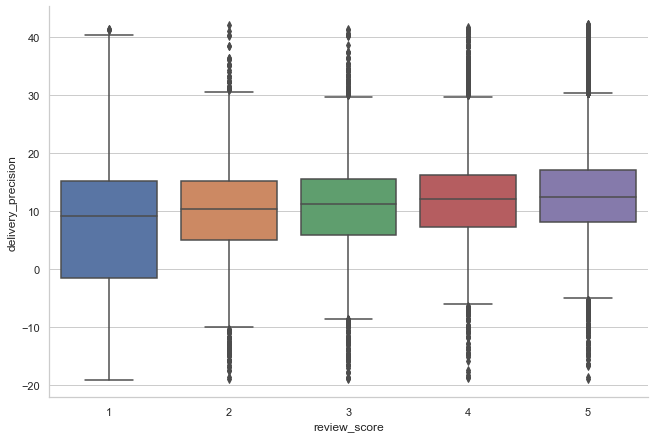

In [65]:
ax = sns.catplot(x="review_score", y="delivery_precision", kind="box",
                 data=df, height=6, aspect=1.5)

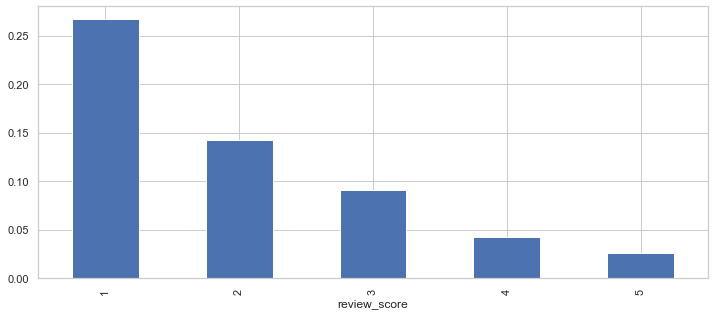

In [66]:
df.groupby('review_score')['late'].mean().plot(kind='bar',figsize=(12,5));

#### The correlation with OCRs is less apparent when analysing description length and photos quantity. Again, this was expected by the low coefficient of correlation shown in the heatmap. From 2-stars to 5-stars orders, the average description size grows shyly, and 1-star orders have descriptions longer than those rated as 2 or 3-stars.

#### Due to the number of photos — although it also has an extremely low correlation — it can be seen that orders rated as 3 to 5 stars have more photos (darker tones in the chart below) than orders rated as 1 or 2 stars.

# Description Lenght

C:\Users\tulio\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\tulio\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


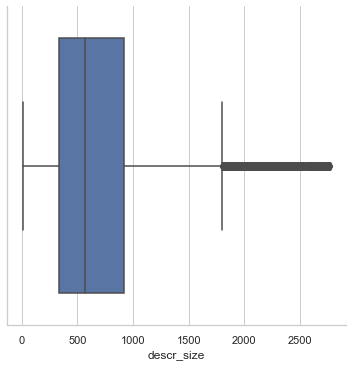

In [67]:
# outliers

ax = sns.catplot(x="descr_size", kind="box",
                 data=df, orient='v')

C:\Users\tulio\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-305.1502260556935, 3084.1502260556936)

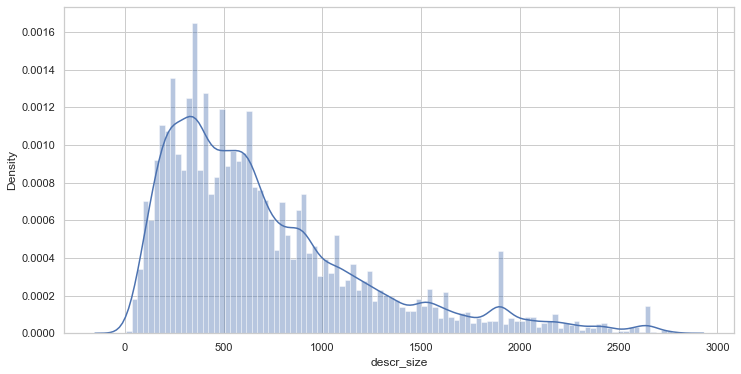

In [68]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.distplot(df['descr_size'], bins=100 ,kde=True, color='b')
plt.xlim()

## *Description Lenght vs Reviews*

In [69]:
(df.groupby('review_score')[['descr_size']].describe()).sort_values(by=('descr_size','mean'), ascending=False)

descr_size                                                     \
                  count        mean         std   min    25%    50%    75%   
review_score                                                                 
5               52365.0  714.937191  524.313870   8.0  339.0  575.0  934.0   
4               17696.0  704.434505  513.626890  20.0  330.0  575.0  920.0   
1                8394.0  685.584227  508.199325  20.0  319.0  556.0  897.0   
3                7816.0  685.300921  505.550980  29.0  319.0  553.0  903.0   
2                2863.0  661.297939  492.385611  31.0  312.0  528.0  871.0   

                      
                 max  
review_score          
5             2771.0  
4             2770.0  
1             2751.0  
3             2763.0  
2             2751.0

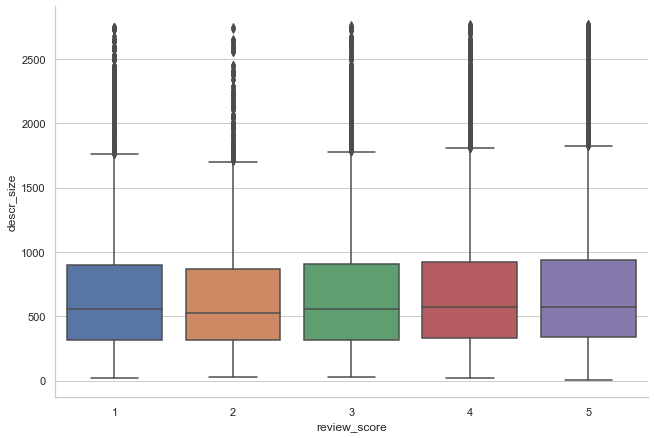

In [70]:
ax = sns.catplot(x="review_score", y="descr_size", kind="box",
                 data=df, height=6, aspect=1.5)

# Photos Qty

C:\Users\tulio\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\tulio\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


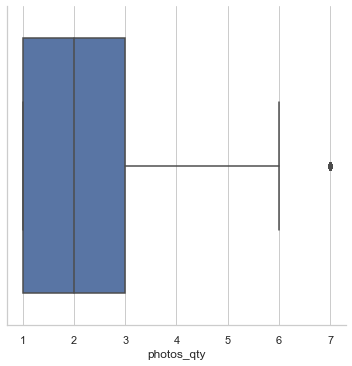

In [71]:
# outliers

ax = sns.catplot(x="photos_qty", kind="box",
                 data=df, orient='v')

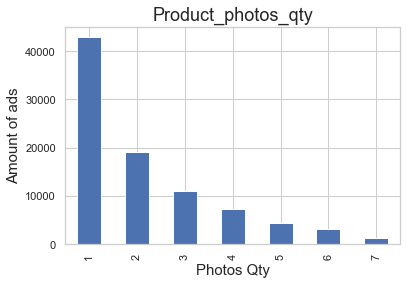

In [72]:
df['photos_qty'].value_counts().plot(kind='bar'); # retorna gráfico de barras das amostras da coluna 'embarked'
plt.title('Product_photos_qty', fontsize=18) # define o titulo
plt.xlabel("Photos Qty", fontsize=15) # define legenda do eixo x
plt.ylabel("Amount of ads", fontsize=15); # define legenda do eixo y

## *Photos Qty vs Reviews*

In [73]:
(df.groupby('review_score')[['photos_qty']].describe()).sort_values(by=('photos_qty','mean'), ascending=False)

photos_qty                                             
                  count      mean       std  min  25%  50%  75%  max
review_score                                                        
4               17696.0  2.192077  1.524003  1.0  1.0  2.0  3.0  7.0
5               52365.0  2.173322  1.502900  1.0  1.0  2.0  3.0  7.0
3                7816.0  2.168756  1.513953  1.0  1.0  2.0  3.0  7.0
2                2863.0  2.097101  1.478356  1.0  1.0  1.0  3.0  7.0
1                8394.0  2.062306  1.438456  1.0  1.0  1.0  3.0  7.0

In [74]:
(df.groupby('photos_qty')[['review_score']].describe()).sort_values(by=('review_score','mean'), ascending=False)

review_score                                             
                  count      mean       std  min  25%  50%  75%  max
photos_qty                                                          
5                4462.0  4.272748  1.164084  1.0  4.0  5.0  5.0  5.0
7                1242.0  4.204509  1.209036  1.0  4.0  5.0  5.0  5.0
3               10955.0  4.175445  1.254271  1.0  4.0  5.0  5.0  5.0
4                7376.0  4.168926  1.257467  1.0  4.0  5.0  5.0  5.0
2               19131.0  4.158852  1.276885  1.0  4.0  5.0  5.0  5.0
6                3052.0  4.148100  1.252341  1.0  4.0  5.0  5.0  5.0
1               42916.0  4.128414  1.297622  1.0  4.0  5.0  5.0  5.0

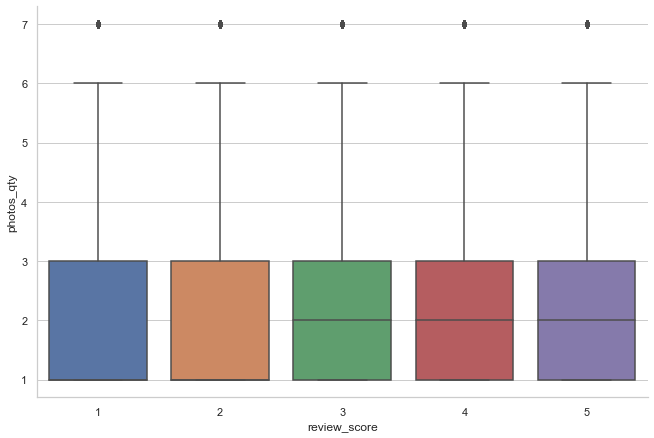

In [75]:
ax = sns.catplot(x="review_score", y="photos_qty", kind="box",
                 data=df, height=6, aspect=1.5)

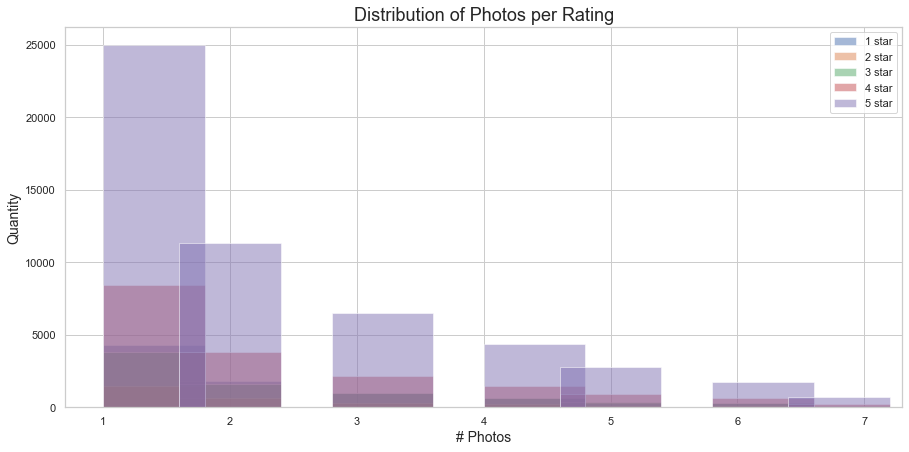

In [76]:
review1 = df.query('review_score == "1"') # atribui o grupo de pessoas que sobreviveram à variável 'df_1'
review2 = df.query('review_score == "2"')
review3 = df.query('review_score == "3"')
review4 = df.query('review_score == "4"')
review5 = df.query('review_score == "5"')


fig, ax = plt.subplots(figsize=(15,7)) # chama o matplotlib para criar o gráfico
ax.hist(review1['photos_qty'], alpha=0.5, label='1 star', width=0.8) # define a amostra da coluna 'age' no grupo de mortos e legenda do histograma 1
ax.hist(review2['photos_qty'], alpha=0.5, label='2 star', width=0.8) # define a amostra da coluna 'age' no grupo de mortos e legenda do histograma 2
ax.hist(review3['photos_qty'], alpha=0.5, label='3 star', width=0.8)
ax.hist(review4['photos_qty'], alpha=0.5, label='4 star', width=0.8)
ax.hist(review5['photos_qty'], alpha=0.5, label='5 star', width=0.8)
ax.set_title('Distribution of Photos per Rating', fontsize=18) # define o título
ax.set_xlabel('# Photos', fontsize=14, ) # define a legenda do eixo x
ax.set_ylabel('Quantity', fontsize=14) # define a legenda do eixo y
ax.legend(loc='upper right') # define local da legenda
plt.show() # retorna o gráfico

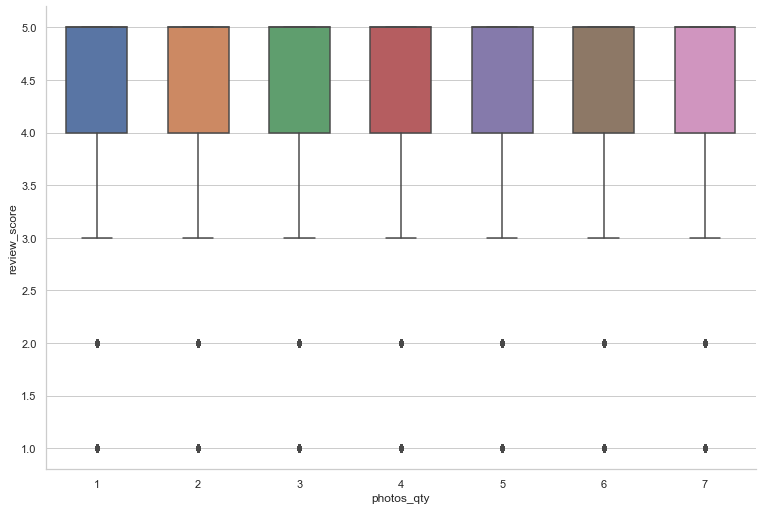

In [77]:
ax = sns.catplot(x="photos_qty", y="review_score", kind="box",
                 data=df[df.review_score < 60], height=7, width=0.6, aspect=1.5)

# 3. Statistics

In the statistical forecasting field, researchers have been using machine learning models to make predictions for decades, being first coined in a 1959 journal paper (Samuel, 1959). But in recent years the use of these models has been progressively demanded by the many possibilities in extracting more granular information from the increasingly available customer data (Shoham, et al., 2017).

To verify the correlation between attributes and OCRs, this study performs predictions that linearly depends on the explanatory data we have, by means of a Linear Regression Analysis (Glasserman, 2011) and by extracting the ratio of variance explained by the regression model, known as the coefficient of determination, or R-squared (Rao, 1973).

Later on, the research explains the possible correlations through a regression method specifically used for arbitrary scaled (a.k.a. ordinal) dependent variables, such as the research’s OCR. Known as Ordinal Logistic Regression, this type of regression can also be considered a classification method (Winship & Mare, 1984).

Next, to validate whether the relationship explained by the earlier regression analyses would work with new information, this research attempts to perform some predictions. It develops a supervised learning classification model using the known observations contained in a separate training set to predict the rating class of given data points. Random Forest (a particular method of ensemble learning) is chosen because it performs very well compared to the other classifiers, is robust against over-fitting and very user-friendly, being widely used both for regression and classification problems from this type of independently-constructed tabular data set (Hastie et al., 2009; Breiman, 2001; Elite Data Science, 2019; Ho, 1995; Thanh Noi & Kappas, 2017).

Because of its Bootstrap Aggregation and Feature Randomness algorithms, Random Forests can handle large data sets, and both numerical and categorical variables with high dimensionalities, without overfitting (unlike a regular Decision Tree) or needing to be standardised (Hastie, et al., 2009). Also, by using a random subset of variables, it reduces the tree’s correlations (Breiman, 2001), producing a more accurate prediction (Ho, 1995) and avoiding features multicollinearity.

Different than Logistic Regression, Random Forests can perform with both linear and non-linear features’ relationships and works with categorical data, with no need to reduce our multiclass problem into multiple binary “dummy” variables, or scaling the highly dimensional features at pre-processing time (Hastie, et al., 2009). In addition, Logistic Regression may suffer from multicollinearity, which is unlikely to happen in Random Forest.

If using Support Vector Machines (SVM), it would also be required to perform one-hot-encoding for the research’s categorical variables since SVM is mainly suited for two-class problems. Besides, SVMs are not designed to predict probabilities (Caruana & Niculescu-Mizil, 2006) as it provides the distance of support vectors from the decision boundary, which still must be converted to get the class probability. Random Forest already gives it, being more easily interpreted. SVMs are more computational-intensive than Random Forest because it usually needs (1) a non-linear kernel trick to work on non-linear features’ dependencies (Boser, et al., 1992), which should be carefully picked for not risking the model accuracy and speed, and (2) longer training time for bigger data sets than RFs. Random Forests usually reaches satisfactory results with the default parameters (Thanh Noi & Kappas, 2017), being typically chosen at first over SVMs in the field of data science (Elite Data Science, 2019).

Naïve Bayes (NB) is also a straightforward classification method, but again, features multicollinearity is likely to happen since it expects them all to be independent to each other (Amancio, et al., 2014), and normally distributed. NB is known to its poorly probability prediction due to this unrealistic independence assumption (Caruana & Niculescu-Mizil, 2006). It might perform very well with high-dimensional small sets (Amancio, et al., 2014) but Random Forest is preferred for working with the more significant number of features and examples in this research’s data set.

The main disadvantage of K-Nearest Neighbours (KNN), compared to Random Forest, is its slower computation time when the sample magnitude is large or high-dimensional. Because KNN finds the neighbours nodes while tracking the training data in real-time, the model can be more memory-intensive. Random Forest simplicity, again, requires no wisely selection of hyperparameters, like the number of k in KNN, which is challenging to set (Thanh Noi & Kappas, 2017); nor feature-scaling, dealing with outliers better than KNN. Finally, Random Forest is more comfortable to interpret, usually outputting the factor’s importance on the classification, unlike KNN.

Artificial Neural Networks (ANN) and deep learning algorithms also have a slower training and execution speed, compared to Random Forests, besides both being powerful methods. ANN, however, requires (1) a large amount of scaled training data, (2) a high level of complexity in computational processing (Thanh Noi & Kappas, 2017) and (3) tuning the architecture and hyperparameters for adequate accuracy, usually being performed after (and sometimes outperformed by) Random Forest for more general classification problems.

Most important, unlike many machine learning methods, especially ANN, Random Forest is not a “black box”. RF produces an index of variables ranked by their importance on the classification accuracy (Breiman, 2001), being easier to interpret the results. Because of its mixed method of Bootstrap Aggregation with Feature Randomness, is possible to measure the importance of each feature, as well as estimate the ensemble’s strength, correlation and generalization error (PE) in every tree’s split, allowing the model to be fit and validated whilst being trained (Breiman, 2001; Hastie, Tibshirani, & Friedman, 2009).

In summary, it is a very simple and complete “out of the box” algorithm. It is usually recommended before trying other methods of classification that takes more time to train and execute.

In [78]:
# change dataset to work with only the data from hypothesis 

df_stats = df[['review_score','prod_value', 'delivery_value', 'total_value', 'descr_size', 'photos_qty', 'delivery_est_time', 'delivery_act_time', 'delivery_precision', 'late']]
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89134 entries, b95df3cef5297e79ef709ba256518f6f to a1e669675b45abe7edd5da0ff226e26b
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review_score        89134 non-null  int64  
 1   prod_value          89134 non-null  float64
 2   delivery_value      89134 non-null  float64
 3   total_value         89134 non-null  float64
 4   descr_size          89134 non-null  int64  
 5   photos_qty          89134 non-null  int64  
 6   delivery_est_time   89134 non-null  float64
 7   delivery_act_time   89134 non-null  float64
 8   delivery_precision  89134 non-null  float64
 9   late                89134 non-null  bool   
dtypes: bool(1), float64(6), int64(3)
memory usage: 9.4+ MB


In [79]:
df_stats.head()

,review_score,prod_value,delivery_value,total_value,descr_size,photos_qty,delivery_est_time,delivery_act_time,delivery_precision,late
order_id,,,,,,,,,,
b95df3cef5297e79ef709ba256518f6f,5,349.90,13.84,363.74,625,1,42.278461,5.739851,36.538609,False
e98077a0d199a25a40eab3b14cc230d4,5,39.99,15.23,55.22,405,2,22.440556,10.313157,12.127398,False
8a723730400b508cbf47fbef4a76ec8e,5,60.00,20.91,80.91,1665,1,23.471516,12.588803,10.882713,False
cf71b9b6b7ed12d72f541b0420023f19,4,79.99,10.94,90.93,492,3,14.018426,7.957293,6.061133,False
93ef9253c47e7dfc633c01f728488cb1,4,58.99,11.73,70.72,492,2,13.620093,5.293556,8.326536,False


<AxesSubplot:>

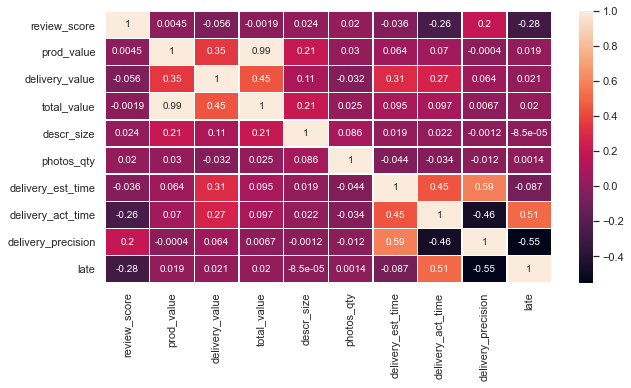

In [80]:
fig, ax = plt.subplots(figsize=(10,5))         # Sample figsize in inches

cor = df_stats.corr()
sns.heatmap(cor, annot=True, fmt=".2g", linewidths=0.5)

Excluding the variables resulting from the previous feature engineering, as they have a high degree of correlation (such as total_value and delivery_precision), there is no visual pattern drawing much attention. Because of this, the Coefficient of Correlation (r) was extracted as a measure of correlation, or, simply put, the linear statistical relationship between two variables indicating the strength of the relationship (Chen & Krauss, 2004).

The value of the Correlation Coefficient is always between +1 and –1, and values closer to zero mean lower correlation (Chen & Krauss, 2004). The variables with the strongest correlations were related to delivery. However, product and delivery’s prices, as well as the amount of information (description and photos), do not have much correlation with the review score.

The variable product_category has been excluded from both correlation techniques above for having its nominal-categorical nature converted into many dummy variables. Moreover, it is a variable that is subdivided into 72 other results, being essential to evaluate not only its means but the number of orders holding each category, which might not represent enough sample size for statistical assumptions.

In [81]:
corr_matrix = df_stats.corr()
corr_matrix['review_score']

review_score          1.000000
prod_value            0.004525
delivery_value       -0.056172
total_value          -0.001934
descr_size            0.023807
photos_qty            0.019899
delivery_est_time    -0.035812
delivery_act_time    -0.256836
delivery_precision    0.197071
late                 -0.284108
Name: review_score, dtype: float64

Aparently, only delivery features has more notable coefficient of correlation 

# 4. Predicting

For the regression analysis, both linear and ordinal logistic regression were performed, being the latter more suitable for predicting dependent variables in an ordinal scale presentation, such as the OCR score (McCullagh, 1980).

First, categorical variables such as late and product_category were changed into numeric variables. Product categories, in particular, were recoded into dummy variables for linear regression analysis, which did not significantly change the output, with an R-squared increasing from 0.099 (not including categories) to 0.106 (including categories). Overall, as expected, the model does not perform well in a linear regression analysis, presenting a typical mean squared prediction error of about 1.206, which is substantial when trying to predict values in a 1-5 array.

Next, the multicollinearity of the predictors has been tested in an ordinary least squares (OLS) regression analysis by checking the Variance Inflation Factor (VIF), which is the proportion of the variances in a multiple-terms model comparing to the one-term model (Gareth, et al., 2017). This collinearity analysis is required to drop any highly correlated predictors and, as expected, the extracted features total_value and delivery_precision (when using the late variable) or delivery_est_time (when not using late) were excluded for having a high VIF.

Therefore, for the ordinal logistic regression, total_value and delivery_precision was removed from the model. The other variables presented a VIF value between 1.0 and 2.0, not needing to be removed.

In [82]:
# excluding total_value

model = sm.OLS.from_formula('review_score ~ prod_value + delivery_value + descr_size + photos_qty + delivery_est_time + delivery_act_time + delivery_precision + late', data=df_stats)

result = model.fit()

print(result.summary())


                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     1404.
Date:                Wed, 14 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:21:15   Log-Likelihood:            -1.4353e+05
No. Observations:               89134   AIC:                         2.871e+05
Df Residuals:                   89126   BIC:                         2.871e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.4233      0

In [83]:
df_stats2 = df[['review_score','prod_value', 'delivery_value', 'total_value', 'descr_size', 'photos_qty', 'delivery_est_time', 'delivery_act_time', 'delivery_precision', 'late', 'product_category_name_english']]
prod_cat_code = pd.get_dummies(df_stats2['product_category_name_english'],drop_first=True) # create a code for each product category
df_stats2 = pd.concat([df_stats2, prod_cat_code], axis = 1) 
df_stats2 = df_stats2.drop('product_category_name_english', axis=1)
df_stats2 = df_stats2.dropna(how='any',axis=0)
df_stats2 = df_stats2.reset_index(drop=True)

df_stats2.to_csv('df_nocat_dummy.csv')

In [84]:
df_stats2.head()

,review_score,prod_value,delivery_value,total_value,descr_size,photos_qty,delivery_est_time,delivery_act_time,delivery_precision,late,...,music,home comfort 2,small appliances home oven and coffee,cds dvds musicals,dvds blu ray,flowers,arts and craftmanship,diapers and hygiene,fashion childrens clothes,security and services
0,5,349.90,13.84,363.74,625,1,42.278461,5.739851,36.538609,False,...,0,0,0,0,0,0,0,0,0,0
1,5,39.99,15.23,55.22,405,2,22.440556,10.313157,12.127398,False,...,0,0,0,0,0,0,0,0,0,0
2,5,60.00,20.91,80.91,1665,1,23.471516,12.588803,10.882713,False,...,0,0,0,0,0,0,0,0,0,0
3,4,79.99,10.94,90.93,492,3,14.018426,7.957293,6.061133,False,...,0,0,0,0,0,0,0,0,0,0
4,4,58.99,11.73,70.72,492,2,13.620093,5.293556,8.326536,False,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# To split correctly, lets first see how classes are distributed over the full dataset.
# We keep the same proportion of classes

df_stats2['review_score'].value_counts() / len(df_stats2['review_score'])

5    0.587486
4    0.198533
1    0.094173
3    0.087688
2    0.032120
Name: review_score, dtype: float64

For splitting the data set into training and test sets, a model selection tool from scikit-learn library known as Stratified ShuffleSplit was used as cross-validator. It “provides train/test indices to split data into train/test sets”, returning “stratified randomised folds (…) made by preserving the percentage of samples for each class” (scikit-learn developers, 2019). 

This type of split better represent the original set and potentially decreases any bias for Random Forest Regression and Classification. The proportion of training and test set size was set as 80:20. Next, the Labels and Features data sets were created, separating review_score from the other features

In [86]:
# Stratified Split

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index2, test_index2 in split.split(df_stats2, df_stats2['review_score']):
    train_set2 = df_stats2.loc[train_index2]
    test_set2 = df_stats2.loc[test_index2]

In [87]:
train_set2['review_score'].value_counts() / len(train_set2['review_score'])


5    0.587488
4    0.198536
1    0.094170
3    0.087691
2    0.032115
Name: review_score, dtype: float64

In [88]:
# now we need to separate Labels (review_score) From Features, creating a different data set for each

df_features2 = train_set2.drop('review_score', axis=1)
df_labels2 = train_set2['review_score'].copy()

In [89]:
lin_reg2 = LinearRegression()
lin_reg2.fit(df_features2, df_labels2)


LinearRegression()

In [90]:
some_data2 = df_features2.iloc[:10]
some_labels2 = df_labels2.iloc[:10]

In [91]:
print('Predicted: {} \n Labels: {}'.format(list(lin_reg2.predict(some_data2)), list(some_labels2.values)))

Predicted: [4.497425044994471, 4.34900450534381, 2.833270686632621, 3.9064869158807065, 4.073285438635871, 4.300728478621472, 4.050174844510253, 4.358399022360736, 4.244795031404139, 4.15870892285799] 
 Labels: [3, 5, 1, 3, 2, 3, 4, 5, 4, 4]


In [92]:
# Looks like we are not even close to predicting the right values. Lets see whats the root mean squared error.

predictions2 = lin_reg2.predict(df_features2)
lin_mse2 = mean_squared_error(df_labels2, predictions2)
lin_rmse2 = np.sqrt(lin_mse2)
lin_rmse2

1.2065437431627275

A typical prediction error of about 1.20 is not at all satisfying when we are trying to predict values that range from 1 to 5.

The next step was to perform the ordinal logistic regression. The only ordinal categorical variable in the model was the dependent variable review_score, the same as in the linear regression analysis, of course. On the independent variables side, the categorical variables product_category and late were classified as factors in the SPSS Statistics procedures, while prod_value, delivery_value, descr_size, photos_qty, delivery_est_time and delivery_act_time were treated as covariates, with only descr_size and photos_qty not being continuous.

The assumption of no multicollinearity was also validated by removing total_value and delivery_precision from the model and testing the VIF of product_category dummy variables. A full likelihood ratio test was similarly performed to ensure the features would have proportional odds and other assumptions, as normally distributed error terms (residuals) and homoscedasticity are not required for ordinal logistic regression (Menard, 2010). The large sample size also helps to assume linearity of independent variables related to the log odds. Lastly, scaling through standardisation is not required for logistic regression since its own exponential function already saturates a value once it crosses the threshold.

#### Random Forest is one of the most popular ensemble methods for supervised machine learning and is able to perform both regression and classification, “serving as an off-the-shelf procedure for data mining” (Hastie, et al., 2009). It develops a “forest” by building up a multitude of decision trees capable of handling both numerical and categorical data; and non-linear relationship parameters do not affect its performance (Breiman, 2001).

Additionally, Random Forests can handle large data sets with high dimensionalities and will correct decision tree’s potentially model overfitting through their Bootstrap Aggregation (or bagging) and Feature Randomness methods (Hastie, et al., 2009).

The advantage incurred from training the samples with the bagging method before the ensemble process is the creation of different individual learning models, trained on subparts of the same set, reducing the learning process variance before voting or adding the output at the end (Hastie, et al., 2009). In addition, Feature Randomness allows Random Forests constituent trees to use only the random subset of variables (instead of considering all variables as in a standard decision tree), reducing the correlation between trees (Breiman, 2001).

This diversification gives this research’s diverse independent variables more relevant weights according to their importance. 
The result of this vast amount of reasonably uncorrelated trees is a more accurate prediction performance than any of its individual component’s predictions alone (Ho, 1995), compensating the small increase of bias that comes with reducing the variance.

In [93]:
forest_reg2 = RandomForestRegressor()
forest_reg2.fit(df_features2, df_labels2) # training

predictions2 = forest_reg2.predict(df_features2)
forest_mse2 = mean_squared_error(df_labels2, predictions2)
forest_rmse2 = np.sqrt(forest_mse2)
forest_rmse2

0.45102622066490666

Typical error of 0.52 with Random Forest. 

In [94]:
print('Predicted: {} \n Labels: {}'.format(list(forest_reg2.predict(some_data2)), list(some_labels2.values)))

Predicted: [3.22, 4.97, 1.23, 3.29, 2.65, 3.65, 4.11, 4.84, 4.01, 4.0] 
 Labels: [3, 5, 1, 3, 2, 3, 4, 5, 4, 4]


### Taking out the categorical/dummy variables

In [95]:
df_stats3 = df[['review_score','prod_value', 'delivery_value', 'total_value', 'descr_size', 'photos_qty', 'delivery_est_time', 'delivery_act_time', 'delivery_precision', 'late', 'product_category_name_english']]
df_stats3 = df_stats3.drop('product_category_name_english', axis=1)
df_stats3 = df_stats3.dropna(how='any',axis=0)
df_stats3 = df_stats3.reset_index(drop=True)

df_stats3.to_csv('df_nocat_nodummy.csv')

In [96]:
df_stats3.head()

,review_score,prod_value,delivery_value,total_value,descr_size,photos_qty,delivery_est_time,delivery_act_time,delivery_precision,late
0,5,349.90,13.84,363.74,625,1,42.278461,5.739851,36.538609,False
1,5,39.99,15.23,55.22,405,2,22.440556,10.313157,12.127398,False
2,5,60.00,20.91,80.91,1665,1,23.471516,12.588803,10.882713,False
3,4,79.99,10.94,90.93,492,3,14.018426,7.957293,6.061133,False
4,4,58.99,11.73,70.72,492,2,13.620093,5.293556,8.326536,False


In [97]:
# To split correctly, lets first see how classes are distributed over the full dataset.
# We keep the same proportion of classes

df_stats3['review_score'].value_counts() / len(df_stats3['review_score'])

5    0.587486
4    0.198533
1    0.094173
3    0.087688
2    0.032120
Name: review_score, dtype: float64

In [98]:
# Stratified Split
# By doing a stratified split we keep the same proportion between classes. 
# This split better represent the original data and will possibly reduce any bias.

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index3, test_index3 in split.split(df_stats3, df_stats3['review_score']):
    train_set3 = df_stats3.loc[train_index3]
    test_set3 = df_stats3.loc[test_index3]

In [99]:
train_set3['review_score'].value_counts() / len(train_set3['review_score'])


5    0.587488
4    0.198536
1    0.094170
3    0.087691
2    0.032115
Name: review_score, dtype: float64

In [100]:
# now we need to separate Labels (review_score) From Features, creating a different data set for each

df_features3 = train_set3.drop('review_score', axis=1)
df_labels3 = train_set3['review_score'].copy()

In [101]:
lin_reg3 = LinearRegression()
lin_reg3.fit(df_features3, df_labels3)


LinearRegression()

In [102]:
some_data3 = df_features3.iloc[:10]
some_labels3 = df_labels3.iloc[:10]

In [103]:
print('Predicted: {} \n Labels: {}'.format(list(lin_reg3.predict(some_data3)), list(some_labels3.values)))

Predicted: [4.465725902201067, 4.259760179550549, 2.8307553794456313, 3.9470529014418942, 3.9986434844789263, 4.238943084528719, 4.023268415744583, 4.34863442317065, 4.320293913686675, 4.250239159619899] 
 Labels: [3, 5, 1, 3, 2, 3, 4, 5, 4, 4]


In [104]:
# Looks like we are not even close to predicting the right values. Lets see whats the root mean squared error.

predictions3 = lin_reg3.predict(df_features3)
lin_mse3 = mean_squared_error(df_labels3, predictions3)
lin_rmse3 = np.sqrt(lin_mse3)
lin_rmse3

1.211130339980284

A typical prediction error of about 1.21 is not at all satisfying when we are trying to predict values that range from 1 to 5. 

In [105]:
forest_reg3 = RandomForestRegressor()
forest_reg3.fit(df_features3, df_labels3) # training

predictions3 = forest_reg3.predict(df_features3)
forest_mse3 = mean_squared_error(df_labels3, predictions3)
forest_rmse3 = np.sqrt(forest_mse3)
forest_rmse3

0.4544680188577015

Typical error of 0.53 with Random Forest.

In [106]:
print('Predicted: {} \n Labels: {}'.format(list(forest_reg3.predict(some_data3)), list(some_labels3.values)))

Predicted: [3.21, 4.96, 1.36, 3.28, 2.7, 3.49, 4.0, 4.83, 4.0, 3.8739999999999997] 
 Labels: [3, 5, 1, 3, 2, 3, 4, 5, 4, 4]


### Random Forest Classifier with categorical/dummy variables

In [107]:
df_stats4 = df[['review_score','prod_value', 'delivery_value', 'total_value', 'descr_size', 'photos_qty', 'delivery_est_time', 'delivery_act_time', 'delivery_precision', 'late', 'product_category_name_english']]
prod_cat_code = pd.get_dummies(df_stats4['product_category_name_english'],drop_first=True) # create a code for each product category
df_stats4 = pd.concat([df_stats4, prod_cat_code], axis = 1) 
df_stats4 = df_stats4.drop('product_category_name_english', axis=1)
df_stats4 = df_stats4.dropna(how='any',axis=0)
df_stats4 = df_stats4.reset_index(drop=True)

In [108]:
df_stats4.head()

,review_score,prod_value,delivery_value,total_value,descr_size,photos_qty,delivery_est_time,delivery_act_time,delivery_precision,late,...,music,home comfort 2,small appliances home oven and coffee,cds dvds musicals,dvds blu ray,flowers,arts and craftmanship,diapers and hygiene,fashion childrens clothes,security and services
0,5,349.90,13.84,363.74,625,1,42.278461,5.739851,36.538609,False,...,0,0,0,0,0,0,0,0,0,0
1,5,39.99,15.23,55.22,405,2,22.440556,10.313157,12.127398,False,...,0,0,0,0,0,0,0,0,0,0
2,5,60.00,20.91,80.91,1665,1,23.471516,12.588803,10.882713,False,...,0,0,0,0,0,0,0,0,0,0
3,4,79.99,10.94,90.93,492,3,14.018426,7.957293,6.061133,False,...,0,0,0,0,0,0,0,0,0,0
4,4,58.99,11.73,70.72,492,2,13.620093,5.293556,8.326536,False,...,0,0,0,0,0,0,0,0,0,0


In [109]:
# To split correctly, lets first see how classes are distributed over the full dataset.
# We keep the same proportion of classes

df_stats4['review_score'].value_counts() / len(df_stats4['review_score'])

5    0.587486
4    0.198533
1    0.094173
3    0.087688
2    0.032120
Name: review_score, dtype: float64

In [110]:
# Stratified Split
# By doing a stratified split we keep the same proportion between classes. 
# This split better represent the original data and will possibly reduce any bias.

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index4, test_index4 in split.split(df_stats4, df_stats4['review_score']):
    train_set4 = df_stats4.loc[train_index4]
    test_set4 = df_stats4.loc[test_index4]

In [111]:
train_set4['review_score'].value_counts() / len(train_set4['review_score'])


5    0.587488
4    0.198536
1    0.094170
3    0.087691
2    0.032115
Name: review_score, dtype: float64

In [112]:
# now we need to separate Labels (review_score) From Features, creating a different data set for each

df_features4 = train_set4.drop('review_score', axis=1)
df_labels4 = train_set4['review_score'].copy()

In [113]:
some_data4 = df_features4.iloc[:10]
some_labels4 = df_labels4.iloc[:10]

In [114]:
forest_clas = RandomForestClassifier(n_estimators=100)
forest_clas.fit(df_features4, df_labels4) # training

predictions4 = forest_clas.predict(df_features4)
forest_mse4 = mean_squared_error(df_labels4, predictions4)
forest_rmse4 = np.sqrt(forest_mse4)
forest_rmse4


0.12956299912940142

Typical error of 0.12 with Random Forest Classifier. Even better than Regression.

As expected, the Random Forest classification results were better than its regression. The first ten rows of both Features and Labels data sets have been copied and separated for later predictive simulation (Table 14 and Table 15).
The typical mean squared error of the regression is 0.5289 with dummy variables and 0.5299 without dummy variables. It is interesting to note that while the dummy variables did not decrease performance, their contribution was also not significant.
Yet, this model has a better predictive algorithm than the linear regression, which presented a mean squared error of 1,206.

In [ ]:
#import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
#from sklearn.ensemble import RandomForestClassifier

# Author: Kian Ho <hui.kian.ho@gmail.com>
#         Gilles Louppe <g.louppe@gmail.com>
#         Andreas Mueller <amueller@ais.uni-bonn.de>
#
# License: BSD 3 Clause

print(__doc__)

RANDOM_STATE = 123

# Generate a binary classification dataset.
#X, y = make_classification(n_samples=500, n_features=25,
 #                          n_clusters_per_class=1, n_informative=15,
  #                         random_state=RANDOM_STATE)

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(df_features4, df_labels4)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

Automatically created module for IPython interactive environment


C:\Users\tulio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\tulio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\tulio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\tulio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\tulio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were 

In [ ]:
print('Predicted: {} \n Labels: {}'.format(list(forest_clas.predict(some_data4)), list(some_labels4.values)))

In [ ]:
print(classification_report(df_labels4,predictions4))

In [ ]:
for col in df_stats4.columns: 
    print(col)

In [ ]:
#forest_clas = RandomForestClassifier(n_estimators=100)
#forest_clas.fit(df_features4, df_labels4) # training


from sklearn.metrics import f1_score

### single feature information evaluation
#n_trees = 1000
features = df_stats4[["prod_value", "freight_value", "descr_size", "photos_qty", "delivery_est_time", "delivery_act_time", "late", "computers accessories", "auto", "bed bath table", "furniture decor", "sports leisure", "perfumery", "housewares", "telephony", "watches gifts", "food drink", "baby", "stationery", "tablets printing image", "toys", "fixed telephony", "garden tools", "fashion bags accessories", "small appliances", "consoles games", "audio", "fashion shoes", "cool stuff", "luggage accessories", "air conditioning", "construction tools construction", "kitchen dining laundry garden furniture", "costruction tools garden", "fashion male clothing", "pet shop", "office furniture", "market place", "electronics", "home appliances", "party supplies", "home confort", "costruction tools tools", "agro industry and commerce", "furniture mattress and upholstery", "books technical", "home construction", "musical instruments", "furniture living room", "construction tools lights", "industry commerce and business", "food", "art", "furniture bedroom", "books general interest", "construction tools safety", "fashion underwear beach", "fashion sport", "signaling and security", "computers", "christmas supplies", "fashio female clothing", "home appliances 2", "books imported", "drinks", "cine photo", "la cuisine", "music", "home comfort 2", "small appliances home oven and coffee", "cds dvds musicals", "dvds blu ray", "flowers", "arts and craftmanship", "diapers and hygiene", "fashion childrens clothes", "security and services"]]
#features = df_stats4[["prod_value", "freight_value", "total_value", "descr_size", "photos_qty", "delivery_est_time", "delivery_act_time", "delivery_precision", "late"]]
#rf = RandomForestClassifier(n_trees)
#rf.fit(X, Y)
plt_x = np.linspace(0,len(features)-1,len(features))
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: float("{0:.5f}".format(round(x, 4))), forest_clas.feature_importances_), features),
             reverse=True))

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

mpl.rc('font', **font)

plt.figure(figsize=(25,20))

plt.bar(plt_x, forest_clas.feature_importances_, width=0.5, color="blue",align='center')
plt.gca().set_xticklabels(plt_x, rotation=60 )
plt.xticks(plt_x, features)
plt.ylabel("relative information")
plt.xlabel("features")
plt.show()

In [ ]:
# dot_data = export_graphviz(forest_clas, out_file=None,
                          
  #                       filled=True, rounded=True,
   #                      special_characters=True)

#graph = graphviz.Source(dot_data)
#graph.render("wine") # tree saved to wine.pdf

#### Visualizing

In [ ]:
# big tree

#from sklearn.tree import export_graphviz

#tree = forest_reg3.estimators_[5]


# Export as dot file
#export_graphviz(tree, out_file='tree.dot', 
 #               rounded = True, proportion = False, 
  #              precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
#from IPython.display import Image
#Image(filename = 'tree.png')

In [ ]:
# Limit depth of tree to 3 levels

#rf_small = RandomForestRegressor(n_estimators=10, max_depth = 5)
#rf_small.fit(df_features3, df_labels3)

# Extract the small tree
#tree_small = rf_small.estimators_[9]

# Save the tree as a png image
# export_graphviz(tree_small, out_file = 'small_tree.dot', rounded = True, precision = 1)
# (graph, ) = pydot.graph_from_dot_file('small_tree.dot')
# graph.write_png('small_tree.png');

# Export as dot file
#export_graphviz(tree_small, out_file='small_tree.dot', feature_names = ['prod_value', 'freight_value', 'total_value', 'descr_size', 'photos_qty', 'delivery_est_time', 'delivery_act_time', 'delivery_precision', 'late'],
 #               rounded = True, proportion = False, 
  #              precision = 1, filled = True)

# Convert to png using system command (requires Graphviz)
#from subprocess import call
#call(['dot', '-Tpng', 'small_tree.dot', '-o', 'small_tree.png', '-Gdpi=600'])

# Display in jupyter notebook
#from IPython.display import Image
#Image(filename = 'small_tree.png')